IMPORTING ALL IMPORTANT LIBRARIES OF THIS DATASET

In [520]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sn
import warnings as w
w.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import re 
import joblib as j



IMPORTING THE DATASET

In [521]:
df=pd.read_csv('mobile_prices_2023.csv')

In [522]:
df.sample(5)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
1403,Nokia 108 Dual SIM,4.2,"8,297",4 MB RAM,4 MB ROM,0.3MP Rear Camera,NaN,950 mAh,1 Year Manufacturer Warranty,"₹2,149",2023-06-17
1073,"vivo Y21 (Midnight Blue, 128 GB)",4.3,"14,939",4 GB RAM,128 GB ROM,13MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Helio P35 Processor,"₹13,499",2023-06-17
828,"OPPO Reno (JET BLACK, 128 GB)",4.1,10,8 GB RAM,128 GB ROM,48MP Rear Camera,NaN,3765 mAh,Brand Warranty of 1 Year Available for Mobile ...,"₹39,990",2023-06-17
1755,"Infinix Zero 5G 2023 (Coral Orange, 128 GB)",4.1,"3,299",8 GB RAM,128 GB ROM,50MP + 2MP + 2MP,16MP Front Camera,5000 mAh,Mediatek Dimensity 920 Processor,"₹16,599",2023-06-17
1480,"MOTOROLA g22 (Cosmic Black, 64 GB)",3.8,"33,725",4 GB RAM,64 GB ROM,50MP + 8MP + 2MP + 2MP,16MP Front Camera,5000 mAh,Mediatek Helio G37 Processor,"₹10,999",2023-06-17


In [523]:
df.drop('Date of Scraping',axis=1,inplace=True)

In [524]:
df.sample(3)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
249,Realme C30 - Locked with Airtel Prepaid (Denim...,4.2,"1,04,291",2 GB RAM,32 GB ROM,8MP Rear Camera,5MP Front Camera,5000 mAh,Unisoc T612 Processor,"₹5,549"
1094,"vivo Y51A (Crystal Symphony, 128 GB)",4.3,"10,554",8 GB RAM,128 GB ROM,48MP + 8MP + 2MP,16MP Front Camera,5000 mAh,Qualcomm Snapdragon 662 Processor,"₹17,990"
1289,"Redmi 8 (Sapphire Blue, 64 GB)",4.4,"9,45,051",4 GB RAM,64 GB ROM,12MP + 2MP,8MP Front Camera,5000 mAh,Qualcomm Snapdragon 439 Processor,"₹10,749"


In [525]:
df['Phone Name'].unique()

array(['POCO C50 (Royal Blue, 32 GB)', 'POCO M4 5G (Cool Blue, 64 GB)',
       'POCO C51 (Royal Blue, 64 GB)', ...,
       'Infinix Note 7 (Aether Black, 64 GB)',
       'Infinix Zero 8i (Silver Diamond, 128 GB)',
       'Infinix S5 (Quetzal Cyan, 64 GB)'], dtype=object)

In [526]:
df['Phone Name'].value_counts()

SAMSUNG Guru Music 2                          9
OnePlus 10R 5G (Sierra Black, 256 GB)         5
Nokia 8210 4G                                 4
OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)    4
Nokia 3310 DS 2020                            4
                                             ..
OPPO A785G (Blue, 128 GB)                     1
OPPO A54 (Moonlight Gold, 64 GB)              1
OPPO A54 (Crystal Black, 64 GB)               1
OPPO A16E (White, 32 GB)                      1
Infinix S5 (Quetzal Cyan, 64 GB)              1
Name: Phone Name, Length: 1507, dtype: int64

HERE WE HAD TAKEN THE STATISTICAL MEASURE AND INFO OF OUR DATASET

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM                1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
dtypes: float64(1), object(9)
memory usage: 143.6+ KB


In [528]:
df.isna().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM                  174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
dtype: int64

FROM HERE I HAD STARTED FEATURE EXTRACTION AND CLEANING PROCESS OF OUR DATASET

In [529]:
def brand(x):
    return x.split()[0] if isinstance(x,str) else None
df['Phone Brand']=df['Phone Name'].apply(brand)

In [530]:
df.sample(10)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand
1238,"Xiaomi 12 Pro 5G (Noir Black, 256 GB)",4.2,246,8 GB RAM,256 GB ROM,50MP Rear Camera,NaN,4600 mAh,Snapdragon@ 8 Gen 1 Processor,"₹46,880",Xiaomi
1182,"Redmi 6A (Blue, 32 GB)",4.3,"57,356",2 GB RAM,32 GB ROM,13MP Rear Camera,NaN,3000 mAh,Mediateck Processor,"₹6,749",Redmi
1119,"Redmi Go (Blue, 16 GB)",4.3,"1,67,942",1 GB RAM,16 GB ROM,8MP Rear Camera,5MP Front Camera,3000 mAh,Qualcomm Snapdragon 425 Processor,"₹5,999",Redmi
864,"Google Pixel 6a (Chalk, 128 GB)",4.3,"45,924",6 GB RAM,128 GB ROM,12.2MP + 12MP,8MP Front Camera,4410 mAh,Google Tensor Processor,"₹31,999",Google
1149,"Redmi Go (Blue, 8 GB)",4.3,"1,67,942",1 GB RAM,8 GB ROM,8MP Rear Camera,5MP Front Camera,3000 mAh,Qualcomm Snapdragon 425 Processor,"₹5,999",Redmi
1515,Motorola a10,4.2,"7,535",0 MB ROM,Expandable Upto 32 GB,1750 mAh Battery,NaN,2 mAh,NaN,"₹1,399",Motorola
1835,"Infinix S5 (Quetzal Cyan, 64 GB)",4.3,"15,701",4 GB RAM,64 GB ROM,16MP + 5MP + 2MP + Low Light Sensor,32MP Front Camera,4000 mAh,Helio P22 (MTK6762) Processor,"₹10,999",Infinix
1204,"�9A (Midnight Black, 32 GB)",0.0,0,3 GB RAM,32 GB ROM,13MP Rear Camera,NaN,5000 mAh,1 Year Manufacturer Warranty for Handset and 6...,"₹9,499",�9A
840,"OPPO A12 (Flowing Silver, 64 GB)",4.4,"67,861",4 GB RAM,64 GB ROM,13MP + 2MP,5MP Front Camera,4230 mAh,MediaTek Helio P35 Processor,"₹10,990",OPPO
1173,"Redmi 6A (Rose Gold, 32 GB)",4.3,"57,356",2 GB RAM,32 GB ROM,13MP Rear Camera,NaN,3000 mAh,Mediateck Processor,"₹6,969",Redmi


In [531]:
df['Phone Brand'].unique()

array(['POCO', 'realme', 'Realme', 'APPLE', 'Apple', 'SAMSUNG', 'OPPO',
       'Google', 'vivo', 'Nothing', 'REDMI', 'Redmi', 'Mi', 'Xiaomi',
       '10A', '�9A', 'Nokia', 'MOTOROLA', 'A10E', 'Motorola', 'a', 'Moto',
       'OnePlus', 'Huawei', 'Nexus', 'Alcatel', 'Lenovo', 'Infinix'],
      dtype=object)

In [532]:
def conversion(x):
    return str.capitalize(x)
df['Phone Brand']=df['Phone Brand'].apply(conversion)


In [533]:
df['Phone Brand'].unique()

array(['Poco', 'Realme', 'Apple', 'Samsung', 'Oppo', 'Google', 'Vivo',
       'Nothing', 'Redmi', 'Mi', 'Xiaomi', '10a', '�9a', 'Nokia',
       'Motorola', 'A10e', 'A', 'Moto', 'Oneplus', 'Huawei', 'Nexus',
       'Alcatel', 'Lenovo', 'Infinix'], dtype=object)

In [534]:
df['Phone Brand'].value_counts()

Realme      240
Samsung     240
Vivo        216
Apple       144
Nokia       144
Poco        120
Oneplus     120
Infinix     120
Oppo        120
Redmi       116
Motorola     84
Mi           45
Xiaomi       28
Alcatel      24
Lenovo       24
Google       17
Huawei       11
Moto          8
Nothing       5
Nexus         3
A10e          2
A             2
�9a           2
10a           1
Name: Phone Brand, dtype: int64

In [535]:
column=['A10e','A','�9a','10a']
df=df[~df['Phone Brand'].isin(column)]

In [536]:
df['Phone Brand'].unique()

array(['Poco', 'Realme', 'Apple', 'Samsung', 'Oppo', 'Google', 'Vivo',
       'Nothing', 'Redmi', 'Mi', 'Xiaomi', 'Nokia', 'Motorola', 'Moto',
       'Oneplus', 'Huawei', 'Nexus', 'Alcatel', 'Lenovo', 'Infinix'],
      dtype=object)

<Axes: xlabel='Phone Brand', ylabel='Count'>

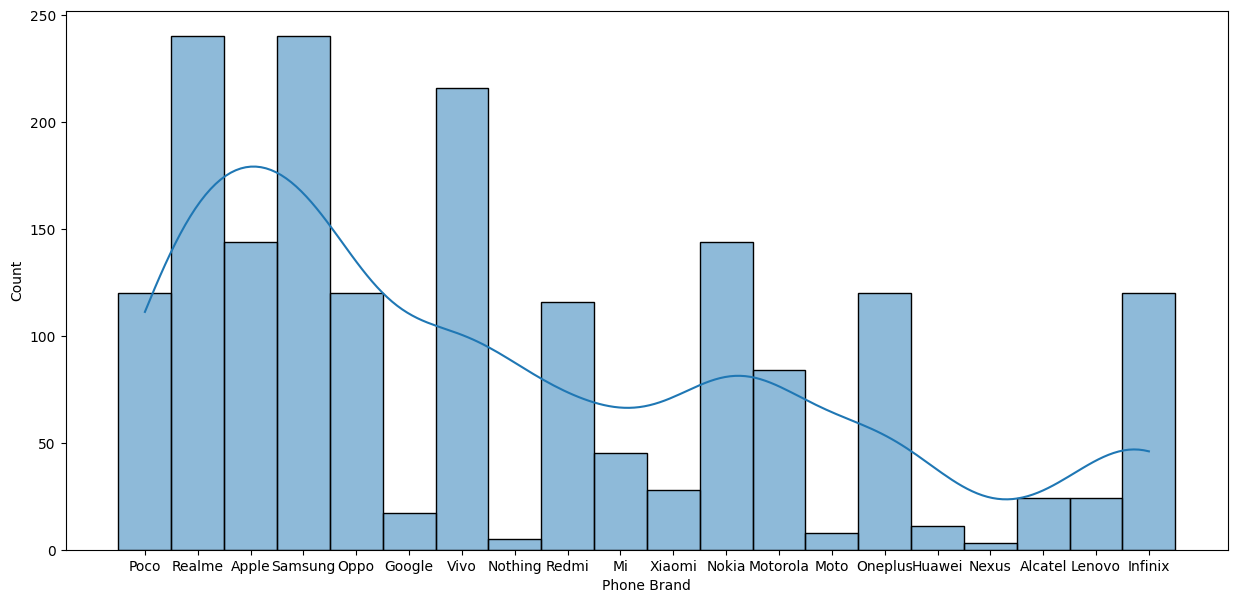

In [537]:
mp.figure(figsize=(15,7))
sn.histplot(data=df,x='Phone Brand',kde=True)

In [538]:
df.sample(5)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand
1000,"vivo Y75 5G (Starlight Black, 128 GB)",4.4,"1,370",8 GB RAM,128 GB ROM,50MP + 2MP + 2MP,16MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹21,990",Vivo
959,"vivo Y21E (Midnight Blue, 64 GB)",4.3,340,3 GB RAM,64 GB ROM,13MP Rear Camera,NaN,5000 mAh,12 months,"₹12,190",Vivo
993,"vivo T1 5G (Starlight Black, 128 GB)",4.4,"1,75,223",6 GB RAM,128 GB ROM,50MP + 2MP + 2MP,16MP Front Camera,5000 mAh,Qualcomm Snapdragon 695 Processor,"₹16,990",Vivo
1547,"OnePlus 10R (Forest Green, 256 GB)",4.2,139,12 GB RAM,256 GB ROM,50MP Rear Camera,NaN,5000 mAh,1 Year Manufacturer Warranty for Handset and 6...,"₹37,990",Oneplus
1222,"Redmi 4A (Dark Grey, 32 GB)",4.4,"2,10,232",3 GB RAM,32 GB ROM,13MP Rear Camera,5MP Front Camera,3120 mAh,Qualcomm Snapdragon 425 1.4 GHz Processor,"₹6,999",Redmi


In [539]:
df['Phone Name'] = df['Phone Name'].apply(lambda x: x.split(" "))


In [540]:
df['Phone Name']

    

0                    [POCO, C50, (Royal, Blue,, 32, GB)]
1                  [POCO, M4, 5G, (Cool, Blue,, 64, GB)]
2                    [POCO, C51, (Royal, Blue,, 64, GB)]
3                     [POCO, C55, (Cool, Blue,, 64, GB)]
4                   [POCO, C51, (Power, Black,, 64, GB)]
                              ...                       
1831        [Infinix, Note, 7, (Forest, Green,, 64, GB)]
1832        [Infinix, Note, 7, (Bolivia, Blue,, 64, GB)]
1833        [Infinix, Note, 7, (Aether, Black,, 64, GB)]
1834    [Infinix, Zero, 8i, (Silver, Diamond,, 128, GB)]
1835             [Infinix, S5, (Quetzal, Cyan,, 64, GB)]
Name: Phone Name, Length: 1829, dtype: object

In [541]:
def extrct(x):
    result=[]
    for i in x:
        if i!=x[0]:
            
            result.append(i)

        
    return result



In [542]:
df['Model Name']=df['Phone Name'].apply(extrct)

In [543]:
df['Model Name']=df['Model Name'].apply(lambda x: " ".join(x))

In [544]:
df['Model Name']

0                C50 (Royal Blue, 32 GB)
1               M4 5G (Cool Blue, 64 GB)
2                C51 (Royal Blue, 64 GB)
3                 C55 (Cool Blue, 64 GB)
4               C51 (Power Black, 64 GB)
                      ...               
1831        Note 7 (Forest Green, 64 GB)
1832        Note 7 (Bolivia Blue, 64 GB)
1833        Note 7 (Aether Black, 64 GB)
1834    Zero 8i (Silver Diamond, 128 GB)
1835            S5 (Quetzal Cyan, 64 GB)
Name: Model Name, Length: 1829, dtype: object

HERE I USED THE REGX TO CATCH AND REMOVAL OF SPECFIC PATTEREN IF PRESENT IN MODEL NAME OF PHONE

In [545]:


def remove_content(text):

    pattern = r'\([^()]*\)|\b5\s*G\b|\+'
    

    modified_text = re.sub(pattern, '', text).strip()
    
    return modified_text

df['Model Name']=df['Model Name'].apply(remove_content)

def removee_content(text):

    pattern = r'\([^()]*\)|\b5\s*G\b|\+'

    modified_text = re.sub(pattern, '', text).strip()
    
    return modified_text

df['Model Name']=df['Model Name'].apply(removee_content)



In [546]:
df['Model Name'].unique()

array(['C50', 'M4', 'C51', 'C55', 'M5', 'M4 Pro', 'X5', 'X5 Pro',
       'M3 Pro', 'X4 Pro', 'F5', 'C31', 'X2', 'F1', 'F4', 'C3',
       'M2 Reloaded', 'M2 Pro', 'X3 Pro', 'M3', 'X3', 'F3 GT', 'M2',
       'C33 2023', 'C30', '10 Pro', '10', '9  SE', 'narzo 50i Prime',
       'Narzo 50i Prime', '9i', 'Narzo 50', 'Narzo N55', 'C25s', 'C21Y',
       'C35', 'Narzo 50i', 'C33', 'Narzo 30', 'GT 2', '8i',
       'Narzo 30 Pro', 'C11 2021', 'Narzo 50A Prime', 'NARZO 50A PRIME',
       'C30s', 'Narzo 50A', 'X3 SuperZoom', '8', '9 Pro', '9',
       'C30 - Locked with Airtel Prepaid', 'GT Master Edition', 'C21',
       'GT Neo 3T', 'narzo 50', 'C25_Y', 'Narzo 50 Pro', '6 Pro', 'C25Y',
       '3i', 'C12', 'C20', 'C25', 'Narzo 30A', '6', 'iPhone 13',
       'iPhone 14', 'iPhone 11', 'iPhone 14 Plus', 'iPhone 12',
       'iPhone 14 Pro Max', 'iPhone 14 Pro', 'iPhone 13 Pro',
       'iPhone 13 Pro Max', 'iPhone 13 mini', 'iPhone SE 3rd Gen',
       'iPhone SE', 'iPhone XR', 'iPhone 11 Pro Max', 'iPho

In [547]:
df=df[df['Model Name']!='C30 - Locked with Airtel Prepaid']

In [548]:
df.sample(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name
272,"[realme, 9, Pro, 5G, (Midnight, Black,, 128, GB)]",4.4,"85,111",6 GB RAM,128 GB ROM,64MP + 8MP + 2MP,16MP Front Camera,5000 mAh,Qualcomm Snapdragon 695 Processor,"₹18,999",Realme,9 Pro
1143,"[Redmi, Y2, (Dark, Grey,, 64, GB)]",4.4,"27,509",4 GB RAM,64 GB ROM,12MP + 5MP,16MP Front Camera,3080 mAh,Qualcomm Snapdragon 625 Processor,"₹13,600",Redmi,Y2


In [549]:

df['Model Name'] = df['Model Name'].apply(lambda x: x.replace("_", ""))

df['Model Name'].unique()

array(['C50', 'M4', 'C51', 'C55', 'M5', 'M4 Pro', 'X5', 'X5 Pro',
       'M3 Pro', 'X4 Pro', 'F5', 'C31', 'X2', 'F1', 'F4', 'C3',
       'M2 Reloaded', 'M2 Pro', 'X3 Pro', 'M3', 'X3', 'F3 GT', 'M2',
       'C33 2023', 'C30', '10 Pro', '10', '9  SE', 'narzo 50i Prime',
       'Narzo 50i Prime', '9i', 'Narzo 50', 'Narzo N55', 'C25s', 'C21Y',
       'C35', 'Narzo 50i', 'C33', 'Narzo 30', 'GT 2', '8i',
       'Narzo 30 Pro', 'C11 2021', 'Narzo 50A Prime', 'NARZO 50A PRIME',
       'C30s', 'Narzo 50A', 'X3 SuperZoom', '8', '9 Pro', '9',
       'GT Master Edition', 'C21', 'GT Neo 3T', 'narzo 50', 'C25Y',
       'Narzo 50 Pro', '6 Pro', '3i', 'C12', 'C20', 'C25', 'Narzo 30A',
       '6', 'iPhone 13', 'iPhone 14', 'iPhone 11', 'iPhone 14 Plus',
       'iPhone 12', 'iPhone 14 Pro Max', 'iPhone 14 Pro', 'iPhone 13 Pro',
       'iPhone 13 Pro Max', 'iPhone 13 mini', 'iPhone SE 3rd Gen',
       'iPhone SE', 'iPhone XR', 'iPhone 11 Pro Max', 'iPhone 11 Pro',
       'iPhone 12 mini', 'iPhone 6s', 'i

In [550]:
df=df[df['Model Name']!='C30 - Locked with Airtel Prepaid']


In [551]:
df.sample(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name
1631,"[OnePlus, Nord, 2, 5G, (Gray, Sierra,, 256, GB)]",4.3,230,12 GB RAM,256 GB ROM,50MP Rear Camera,NaN,4500 mAh,1 year Warranty,"₹33,997",Oneplus,Nord 2
99,"[POCO, X3, Pro, (Golden, Bronze,, 128, GB)]",4.3,"1,37,003",6 GB RAM,128 GB ROM,48MP + 8MP + 2MP + 2MP,20MP Front Camera,5160 mAh,Qualcomm Snapdragon 860 Processor,"₹23,999",Poco,X3 Pro


In [552]:
df['Rating']=df['Rating ?/5']
df['Rating'].isnull().sum()

0

In [553]:
df['Rating'].unique()

array([4.2, 4.3, 4.1, 4.5, 4.4, 4.6, 4.7, 4. , 3.7, 0. , 3.9, 3.8, 3.6,
       3. , 3.5, 3.4, 3.3, 2.6, 3.2, 1. , 2.8])

In [554]:
df['Number of Ratings']=df['Number of Ratings'].apply(lambda x: x.replace(",","")).astype(float)

In [555]:
df=df[df['Number of Ratings']>1000]

In [556]:
df['Number of Ratings']

0       33561.0
1       77128.0
2       15175.0
3       22621.0
4       15175.0
         ...   
1831    25582.0
1832    25582.0
1833    25582.0
1834     7117.0
1835    15701.0
Name: Number of Ratings, Length: 1443, dtype: float64

In [557]:
df

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating
0,"[POCO, C50, (Royal, Blue,, 32, GB)]",4.2,33561.0,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",Poco,C50,4.2
1,"[POCO, M4, 5G, (Cool, Blue,, 64, GB)]",4.2,77128.0,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",Poco,M4,4.2
2,"[POCO, C51, (Royal, Blue,, 64, GB)]",4.3,15175.0,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",Poco,C51,4.3
3,"[POCO, C55, (Cool, Blue,, 64, GB)]",4.2,22621.0,4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",Poco,C55,4.2
4,"[POCO, C51, (Power, Black,, 64, GB)]",4.3,15175.0,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",Poco,C51,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,"[Infinix, Note, 7, (Forest, Green,, 64, GB)]",4.3,25582.0,4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",Infinix,Note 7,4.3
1832,"[Infinix, Note, 7, (Bolivia, Blue,, 64, GB)]",4.3,25582.0,4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",Infinix,Note 7,4.3
1833,"[Infinix, Note, 7, (Aether, Black,, 64, GB)]",4.3,25582.0,4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",Infinix,Note 7,4.3
1834,"[Infinix, Zero, 8i, (Silver, Diamond,, 128, GB)]",4.2,7117.0,8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",Infinix,Zero 8i,4.2


In [558]:
df['RAM'].unique()

array(['2 GB RAM', '4 GB RAM', '6 GB RAM', '3 GB RAM', '8 GB RAM',
       '12 GB RAM', '128 GB ROM', '64 GB ROM', '256 GB ROM', '512 GB ROM',
       '16 GB ROM', '32 GB ROM', '8 GB ROM', '1 TB ROM', 'NA ROM',
       'Expandable Upto 16 GB', '8 MB RAM', '0 MB ROM', '4 MB RAM',
       '0.53 RAM', '153 MB RAM', 'NA MB ROM', '1 GB RAM', '16 MB RAM',
       '3.81 cm (1.5 inch) Display', '32 MB RAM', '128 MB RAM',
       '16 MB ROM', '32 MB ROM', '64 MB RAM', '16 GB RAM'], dtype=object)

In [559]:
df['RAM IN GB']=df['RAM']

In [560]:
df.sample(5)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB
706,"[SAMSUNG, Metro, 313, Dual, Sim]",4.2,15015.0,16 MB RAM,2 MB ROM,0.3MP Rear Camera,NaN,1000 mAh,1 Year Manufacturer Warranty,"₹2,340",Samsung,Metro 313 Dual Sim,4.2,16 MB RAM
505,"[SAMSUNG, Galaxy, F13, (Waterfall, Blue,, 128,...",4.3,151074.0,4 GB RAM,128 GB ROM,50MP + 5MP + 2MP,8MP Front Camera,6000 mAh,Exynos 850 Processor,"₹11,999",Samsung,Galaxy F13,4.3,4 GB RAM
968,"[vivo, V27, Pro, 5G, (Noble, Black,, 128, GB)]",4.4,5070.0,8 GB RAM,128 GB ROM,50MP (OIS) + 8MP + 2MP,50MP Front Camera,4600 mAh,Mediatek Dimensity 8200 Processor,"₹37,999",Vivo,V27 Pro,4.4,8 GB RAM
390,"[APPLE, iPhone, 14, Pro, (Space, Black,, 128, ...",4.7,1302.0,128 GB ROM,NaN,48MP + 12MP + 12MP,12MP Front Camera,A16 mAh,1 Year Warranty for Phone and 6 Months Warrant...,"₹1,19,999",Apple,iPhone 14 Pro,4.7,128 GB ROM
254,"[realme, GT, Master, Edition, (Luna, White,, 2...",4.3,62922.0,8 GB RAM,256 GB ROM,64MP + 8MP + 2MP,32MP Front Camera,4300 mAh,Qualcomm Snapdragon 778G Processor,"₹24,999",Realme,GT Master Edition,4.3,8 GB RAM


In [561]:
df['RAM IN GB']=df[df['RAM IN GB'] != 'NA ROM']['RAM IN GB']
df['RAM IN GB']=df[df['RAM IN GB'] != 'nan']['RAM IN GB']


In [562]:
df['RAM IN GB'].unique()

array(['2 GB RAM', '4 GB RAM', '6 GB RAM', '3 GB RAM', '8 GB RAM',
       '12 GB RAM', '128 GB ROM', '64 GB ROM', '256 GB ROM', '512 GB ROM',
       '16 GB ROM', '32 GB ROM', '8 GB ROM', '1 TB ROM', nan,
       'Expandable Upto 16 GB', '8 MB RAM', '0 MB ROM', '4 MB RAM',
       '0.53 RAM', '153 MB RAM', 'NA MB ROM', '1 GB RAM', '16 MB RAM',
       '3.81 cm (1.5 inch) Display', '32 MB RAM', '128 MB RAM',
       '16 MB ROM', '32 MB ROM', '64 MB RAM', '16 GB RAM'], dtype=object)

In [563]:
df['RAM IN GB'] = df['RAM IN GB'].astype(str).apply(lambda x: x.replace("ROM", "RAM"))


In [564]:
df['RAM IN GB'].unique()

array(['2 GB RAM', '4 GB RAM', '6 GB RAM', '3 GB RAM', '8 GB RAM',
       '12 GB RAM', '128 GB RAM', '64 GB RAM', '256 GB RAM', '512 GB RAM',
       '16 GB RAM', '32 GB RAM', '1 TB RAM', 'nan',
       'Expandable Upto 16 GB', '8 MB RAM', '0 MB RAM', '4 MB RAM',
       '0.53 RAM', '153 MB RAM', 'NA MB RAM', '1 GB RAM', '16 MB RAM',
       '3.81 cm (1.5 inch) Display', '32 MB RAM', '128 MB RAM',
       '64 MB RAM'], dtype=object)

In [565]:
def convert_to_gb(value):
    if pd.isnull(value) or value.lower() == 'na':
        return 0  
    elif 'TB' in value:
        try:
            tb_val = float(value.replace('TB RAM', ''))
            gb_val = tb_val * 1024  
            return gb_val
        except ValueError:
            return 0  
    elif 'MB' in value:
        try:
            mb_val = float(value.replace('MB RAM', ''))
            gb_val = mb_val / 1024 
            return gb_val
        except ValueError:
            return 0  
    else:
        return value  
    


df['RAM IN GB'] = df['RAM IN GB'].apply(convert_to_gb)


     

In [566]:
df['RAM IN GB'].unique()

array(['2 GB RAM', '4 GB RAM', '6 GB RAM', '3 GB RAM', '8 GB RAM',
       '12 GB RAM', '128 GB RAM', '64 GB RAM', '256 GB RAM', '512 GB RAM',
       '16 GB RAM', '32 GB RAM', 1024.0, 'nan', 'Expandable Upto 16 GB',
       0.0078125, 0.0, 0.00390625, '0.53 RAM', 0.1494140625, '1 GB RAM',
       0.015625, '3.81 cm (1.5 inch) Display', 0.03125, 0.125, 0.0625],
      dtype=object)

In [567]:
values_to_drop = ['Expandable Upto 16 GB', 'cm Display', 'Expandable Upto 2 GB', '3.81 cm (1.5 inch) Display', 'nan']

df = df[~df['RAM IN GB'].isin(values_to_drop)]



In [568]:
# Removing text and rounding
df['RAM IN GB'] = df['RAM IN GB'].astype(str).str.replace("GB RAM", "").str.replace("RAM", "")




In [569]:
df['RAM IN GB']=df['RAM IN GB'].astype(float)

In [570]:
df.sample(3)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB
1330,"[Nokia, 105, DS, 2020]",4.2,27776.0,4 MB RAM,4 MB ROM,800 mAh3 Li-ion Battery,NaN,Brand mAh,NaN,"₹1,640",Nokia,105 DS 2020,4.2,0.003906
822,"[OPPO, A74, 5G, (Fantastic, Purple,, 128, GB)]",4.3,1253.0,6 GB RAM,128 GB ROM,48MP + 2MP + 2MP,8MP Front Camera,5000 mAh,Brand Warranty of 1 Year Available for Mobile ...,"₹20,980",Oppo,A74,4.3,6.000000
584,"[SAMSUNG, Galaxy, S21, FE, 5G, (Lavender,, 128...",4.3,54879.0,8 GB RAM,128 GB ROM,12MP + 12MP + 8MP (OIS),32MP Front Camera,4500 mAh,1 Year Manufacturer Warranty for Device and 6 ...,"₹39,999",Samsung,Galaxy S21 FE,4.3,8.000000


In [571]:
columns=['Phone Name','Rating ?/5','Number of Ratings','RAM']
df.drop(columns,axis=1,inplace=True)

In [572]:
df.sample(3)

,ROM,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB
1074,128 GB ROM,13MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Helio P35 Processor,"₹13,499",Vivo,Y21,4.3,4.0
16,128 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹13,999",Poco,M4,4.2,6.0
1470,64 GB ROM,50MP + 8MP + 2MP,16MP Front Camera,5000 mAh,Qualcomm Snapdragon 680 Processor,"₹10,999",Motorola,G32,4.2,4.0


In [573]:
df['ROM'].value_counts()

128 GB ROM               559
64 GB ROM                346
32 GB ROM                175
256 GB ROM               101
4 MB ROM                  33
16 GB ROM                 30
8 GB ROM                  11
16 MB ROM                  7
Expandable Upto 32 GB      7
32 MB ROM                  5
48 MB ROM                  5
128 MB ROM                 5
153 MB ROM                 2
2.27 MB ROM                2
NA KB ROM                  1
Expandable Upto 16 GB      1
2 MB ROM                   1
0 GB ROM                   1
NA ROM                     1
Name: ROM, dtype: int64

In [574]:
column=['Expandable Upto 32 GB','Expandable Upto 16 GB','NA KB ROM','NA ROM','Expandable Upto 8 GB','0 GB ROM']
df=df[~df['ROM'].isin(column)]


In [575]:
df['ROM IN GB']=df['ROM']

In [576]:
df['ROM IN GB'].isna().sum()

135

In [577]:
df['ROM IN GB'].unique()

array(['32 GB ROM', '64 GB ROM', '128 GB ROM', '256 GB ROM', nan,
       '4 MB ROM', '153 MB ROM', '8 GB ROM', '2 MB ROM', '2.27 MB ROM',
       '16 GB ROM', '32 MB ROM', '16 MB ROM', '48 MB ROM', '128 MB ROM'],
      dtype=object)

In [578]:
df['ROM IN GB']=df['ROM IN GB'].astype(str).str.replace("GB ROM", "").str.replace("ROM","")

In [579]:
def app(x):
        if pd.isnull(x) or x.lower() == 'nan':
         return 0
        elif 'TB' in x:
         try:
            tb_val = float(x.replace('TB', ''))
            gb_val = tb_val * 1024  # convert TB to GB
            return gb_val
         except ValueError:
            return 0 
      
        elif 'MB' in x:
         try:
            mb_val = float(x.replace('MB', ''))
            gb_val = mb_val / 1024  
            return '{:.3f}'.format(gb_val)
         except ValueError:
            return 0  
        else:
         return x

df['ROM IN GB']=df['ROM IN GB'].apply(app)        
             
        

In [580]:
mode_rom_in_gb = df['ROM IN GB'].mode()[0]
df['ROM IN GB']=df['ROM IN GB'].replace(0, mode_rom_in_gb)

In [581]:
df.sample(10)

,ROM,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB
199,128 GB ROM,108MP + 8MP + 2MP,16MP Front Camera,5000 mAh,Mediatek Dimensity 1080 5G Processor,"₹25,999",Realme,10 Pro,4.4,8.0,128
956,256 GB ROM,64MP + 8MP + 2MP,32MP Front Camera,4830 mAh,Mediatek Dimensity 1300 Processor,"₹33,890",Vivo,V25 Pro,4.3,12.0,256
600,256 GB ROM,50MP + 10MP + 12MP,12MP Front Camera,3900 mAh,Qualcomm Snapdragon 8 Gen 2 Processor,"₹79,999",Samsung,Galaxy S23,4.6,8.0,256
403,NaN,12MP + 12MP,12MP Front Camera,A15 mAh,1 Year Warranty for Phone and 6 Months Warrant...,"₹1,00,999",Apple,iPhone 14,4.6,512.0,128
97,64 GB ROM,13MP + 8MP + 5MP + 2MP,8MP Front Camera,5000 mAh,MediaTek Helio G80 Processor,"₹12,999",Poco,M2,4.4,6.0,64
247,128 GB ROM,50MP + 2MP + 2MP,8MP Front Camera,6000 mAh,MediaTek Helio G85 Processor,"₹11,495",Realme,Narzo 50A,4.4,4.0,128
227,256 GB ROM,50MP + 8MP + 2MP,16MP Front Camera,5000 mAh,Qualcomm Snapdragon 888 Processor,"₹27,999",Realme,GT 2,4.4,12.0,256
651,64 GB ROM,48MP + 8MP + 2MP + 2MP,13MP Front Camera,6000 mAh,MediaTek Helio G80 Processor,"₹11,499",Samsung,Galaxy F22,4.3,4.0,64
1702,64 GB ROM,16MP + 2MP,8MP Front Camera,3760 mAh,Qualcomm Snapdragon SDM450 Processor,"₹11,999",Lenovo,K9 Note,4.1,4.0,64
1105,32 GB ROM,13MP Rear Camera,NaN,5000 mAh,1 Year Warranty,"₹7,175",Redmi,9A Sport,4.1,2.0,32


In [582]:
df['ROM IN GB']=df['ROM IN GB'].astype(float)

In [583]:
df['ROM IN GB'].value_counts()

128.000    694
64.000     346
32.000     175
256.000    101
0.004       33
16.000      30
8.000       11
0.016        7
0.031        5
0.047        5
0.125        5
0.002        3
0.149        2
Name: ROM IN GB, dtype: int64

In [584]:
df.drop('ROM',axis=1,inplace=True)

In [585]:
df.sample(5)

,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB
395,12MP + 12MP,12MP Front Camera,A15 mAh,1 Year Warranty for Phone and 6 Months Warrant...,"₹80,999",Apple,iPhone 14,4.6,256.0,128.0
749,50MP + 0.3MP,5MP Front Camera,5000 mAh,Mediatek Helio G35 Processor,"₹11,929",Oppo,A17,4.4,4.0,64.0
1731,50MP + AI Lens,8MP Front Camera,5000 mAh,Dimensity 810 Processor,"₹13,499",Infinix,Hot 20,4.1,6.0,128.0
521,50MP Rear Camera,NaN,6000 mAh,1 Year Warranty,"₹17,236",Samsung,Galaxy M33,4.2,8.0,128.0
1764,8 MP + Depth Lens,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor,"₹6,999",Infinix,Smart 6,4.3,2.0,64.0


In [586]:
df['No.Back Camera']=df['Back/Rare Camera'].apply(lambda x: len(x.split('+')))

In [587]:
df.sample(5)

,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera
78,12MP + 5MP,20MP Front Camera,4000 mAh,Qualcomm Snapdragon 845 Processor,"₹21,999",Poco,F1,4.5,6.0,64.0,2
1744,8MP + AI Lens,5MP Front Camera,5000 mAh,Spreadtrum SC9863A1 Processor,"₹6,199",Infinix,Smart 7 HD,4.4,2.0,64.0,2
757,8MP Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio P35 Processor,"₹9,499",Oppo,A17k,4.5,3.0,64.0,1
1793,50 MP + 2 MP Depth Lens + AI Lens,16MP Front Camera,5000 mAh,Mediatek Helio G88 Processor,"₹16,999",Infinix,Note 11,4.2,6.0,128.0,3
1466,50MP + 8MP + 2MP,16MP Front Camera,5000 mAh,Qualcomm Snapdragon 680 Processor,"₹13,999",Motorola,g52,4.2,6.0,128.0,3


In [588]:
C_df=df['Back/Rare Camera'].str.split("+",expand=True)

In [589]:
df=pd.concat([df,C_df],axis=1)

In [590]:
df.sample(5)

,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,0,1,2,3
250,50MP + 2MP + 2MP,16MP Front Camera,5000 mAh,Qualcomm Snapdragon 680 (SM6225) Processor,"₹13,499",Realme,9i,4.5,4.0,128.0,3,50MP,2MP,2MP,None
553,12MP + 12MP,10MP Front Camera,3300 mAh,Qualcomm Snapdragon 888 Octa-Core Processor,"₹49,999",Samsung,Galaxy Z Flip3,4.3,8.0,128.0,2,12MP,12MP,None,None
403,12MP + 12MP,12MP Front Camera,A15 mAh,1 Year Warranty for Phone and 6 Months Warrant...,"₹1,00,999",Apple,iPhone 14,4.6,512.0,128.0,2,12MP,12MP,None,None
1761,8 MP + Depth Lens,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor,"₹6,999",Infinix,Smart 6,4.3,2.0,64.0,2,8 MP,Depth Lens,None,None
867,50MP + 12MP,10.8MP Front Camera,4270 mAh,Google Tensor G2 Processor,"₹56,999",Google,Pixel 7,4.4,8.0,128.0,2,50MP,12MP,None,None


In [591]:
df['Back/Rare Camera/MP']=df[0]
df['Back/MP 2']=df[1]
df['Back/MP 3']=df[2]
df['Back/MP 4']=df[3]

In [592]:
df.sample(5)

,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,0,1,2,3,Back/Rare Camera/MP,Back/MP 2,Back/MP 3,Back/MP 4
543,50MP Rear Camera,NaN,6000 mAh,12 Months Warranty,"₹10,857",Samsung,GALAXY M13,4.2,4.000000,64.000,1,50MP Rear Camera,None,None,None,50MP Rear Camera,None,None,None
1334,0.3MP Rear Camera,NaN,1150 mAh,Unisoc 6531F Processor,"₹3,499",Nokia,6310,3.9,0.007812,0.016,1,0.3MP Rear Camera,None,None,None,0.3MP Rear Camera,None,None,None
1602,64MP Rear Camera,NaN,5000 mAh,12 months,"₹21,999",Oneplus,Nord CE 2 Lite,4.3,8.000000,128.000,1,64MP Rear Camera,None,None,None,64MP Rear Camera,None,None,None
255,50MP + 8MP + 2MP,16MP Front Camera,4500 mAh,Mediatek Dimensity 920 Processor,"₹21,999",Realme,9 Pro,4.4,8.000000,256.000,3,50MP,8MP,2MP,None,50MP,8MP,2MP,None
69,48MP + 8MP + 5MP + 2MP,16MP Front Camera,5000 mAh,Qualcomm Snapdragon 720G Processor,"₹19,999",Poco,M2 Pro,4.4,6.000000,128.000,4,48MP,8MP,5MP,2MP,48MP,8MP,5MP,2MP


In [593]:
df['Back/Rare Camera/MP'].unique()

array(['8MP Dual Camera', '50MP ', '8MP Dual Rear Camera',
       '50MP Dual Rear Camera', '64MP ', '48MP ', '108MP ', '64MP (OIS) ',
       '13MP ', '12MP ', '8MP Rear Camera', '50MP Rear Camera',
       '12MP Rear Camera', '5MP Rear Camera', '64MP Rear Camera',
       '800 mAh Battery', '25MP ', '48MP Rear Camera',
       '0.3MP Rear Camera', '13MP Rear Camera', '16MP Rear Camera',
       '16MP ', '12.2MP ', '12.2MP Rear Camera', '64 MP (OIS) ',
       '50MP (OIS) ', '108MP Rear Camera', '20MP ', '0MP Front Camera',
       '1020 mAh Lithium-ion Battery', '800 mAh Lithium Ion Battery',
       '0.8MP Rear Camera', '1MP Rear Camera', '800 mAh3 Li-ion Battery',
       '800 mAh3 Li-Ion Battery', '1150 mAh Lithium-ion Battery',
       '1150 mAh Battery', '800 mAh3 Battery', '0.03MP Rear Camera',
       '1750 mAh Battery', '200MP ', '5000 mAh Battery', '48 MP ',
       '12.3MP Rear Camera', '8MP ', '50 MP ', '13Mp ', '8 MP ', '13 MP '],
      dtype=object)

In [594]:
df['Back/Rare Camera/MP']=df['Back/Rare Camera/MP'].str.extract(r'(\d+\.*\d*)').astype(float).fillna(0)
df['Back/MP 2']=df['Back/MP 2'].str.extract(r'(\d+\.*\d*)').astype(float).fillna(0)
df['Back/MP 3']=df['Back/MP 3'].str.extract(r'(\d+\.*\d*)').astype(float).fillna(0)
df['Back/MP 4']=df['Back/MP 4'].str.extract(r'(\d+\.*\d*)').astype(float).fillna(0)

In [595]:
df['Back/Rare Camera/MP']=df['Back/Rare Camera/MP'].astype(int)
df['Back/MP 2']=df['Back/MP 2'].astype(int)
df['Back/MP 3']=df['Back/MP 3'].astype(int)
df['Back/MP 4']=df['Back/MP 4'].astype(int)

In [596]:
df['Back/MP 3'].unique()

array([ 0,  2,  5,  8, 12, 10, 13, 16])

In [597]:
df['Back/MP 4'].unique()

array([0, 2, 5, 8])

In [598]:
df.sample(5)

,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,0,1,2,3,Back/Rare Camera/MP,Back/MP 2,Back/MP 3,Back/MP 4
1233,13MP Rear Camera,5MP Front Camera,4100 mAh,Qualcomm Snapdragon 430 64-bit Octa Core 1.4GH...,"₹8,999",Redmi,3S Prime,4.3,3.000000,32.000,1,13MP Rear Camera,None,None,None,13,0,0,0
539,50MP Rear Camera,NaN,6000 mAh,1 Year Warranty,"₹15,963",Samsung,Galaxy M33,4.2,6.000000,128.000,1,50MP Rear Camera,None,None,None,50,0,0,0
1330,800 mAh3 Li-ion Battery,NaN,Brand mAh,NaN,"₹1,640",Nokia,105 DS 2020,4.2,0.003906,0.004,1,800 mAh3 Li-ion Battery,None,None,None,800,0,0,0
338,50MP + 2MP + 2MP,8MP Front Camera,5000 mAh,Unisoc T618 Processor,"₹11,999",Realme,C25Y,4.5,4.000000,128.000,3,50MP,2MP,2MP,None,50,2,2,0
463,12MP + 12MP,12MP Front Camera,A14 mAh,Ceramic Shield,"₹56,999",Apple,iPhone 12,4.6,128.000000,128.000,2,12MP,12MP,None,None,12,12,0,0


In [599]:
col=['Back/Rare Camera',0,1,2,3]
df.drop(col,axis=1,inplace=True)

In [600]:
df.sample(5)

,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,Back/Rare Camera/MP,Back/MP 2,Back/MP 3,Back/MP 4
1501,16MP Front Camera,5000 mAh,Mediatek Helio G37 Processor,"₹11,099",Motorola,g22,3.8,4.00000,64.000,4,50,8,2,2
1302,NaN,800 mAh,SC6531E Processor,"₹1,599",Nokia,105 SS,4.2,0.03125,0.031,1,0,0,0,0
2,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",Poco,C51,4.3,4.00000,64.000,1,8,0,0,0
1035,32MP Front Camera,4450 mAh,MediaTek Dimensity 1200 Processor,"₹43,990",Vivo,X70 Pro,4.5,8.00000,128.000,4,50,12,12,8
122,8MP Front Camera,5000 mAh,Helio G88 Processor,"₹13,999",Realme,C55,4.4,8.00000,128.000,2,64,2,0,0


In [601]:
frontC=df['Front Camera'].str.split("+",expand=True)

In [602]:
df=pd.concat([df,frontC],axis=1)

In [603]:
df.sample(5)

,Front Camera,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,Back/Rare Camera/MP,Back/MP 2,Back/MP 3,Back/MP 4,0,1
791,16MP Front Camera,5000 mAh,MediaTek Helio G35 Processor,"₹13,999",Oppo,A55,4.3,4.0,128.0,3,50,2,2,0,16MP Front Camera,None
740,8MP Front Camera,4000 mAh,Qualcomm SDM450-B01 Processor,"₹12,900",Samsung,Galaxy A20s,4.3,3.0,32.0,3,13,8,5,0,8MP Front Camera,None
818,8MP Front Camera,4230 mAh,MediaTek Helio P35 Octa Core Processor,"₹12,990",Oppo,A31,4.3,4.0,64.0,3,12,2,2,0,8MP Front Camera,None
1094,16MP Front Camera,5000 mAh,Qualcomm Snapdragon 662 Processor,"₹17,990",Vivo,Y51A,4.3,8.0,128.0,3,48,8,2,0,16MP Front Camera,None
1000,16MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹21,990",Vivo,Y75,4.4,8.0,128.0,3,50,2,2,0,16MP Front Camera,None


In [604]:
df['Front Camera MP']=df[0].str.extract(r'(\d+\.*\d*)').astype(float).fillna(0)
df['Front S_Camera MP']=df[1].str.extract(r'(\d+\.*\d*)').astype(float).fillna(0)



In [605]:
df['Front Camera MP']=df['Front Camera MP'].astype(int)
df['Front S_Camera MP']=df['Front S_Camera MP'].astype(int)

In [606]:
col=['Front Camera',0,1]
df.drop(col,axis=1,inplace=True)

In [607]:
df.sample(3)

,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,Back/Rare Camera/MP,Back/MP 2,Back/MP 3,Back/MP 4,Front Camera MP,Front S_Camera MP
1184,5000 mAh,1 Year Manufacturer Warranty,"₹6,995",Redmi,9A,4.3,2.0,32.0,1,13,0,0,0,0,0
104,5000 mAh,Qualcomm Snapdragon 720G Processor,"₹17,999",Poco,M2 Pro,4.4,6.0,64.0,4,48,8,5,2,16,0
1696,4050 mAh,Qualcomm SDM710 Processor,"₹16,999",Lenovo,K10 Note,4.1,4.0,64.0,3,16,5,8,0,16,0


In [608]:
df['Battery'].unique()

array(['5000 mAh', '4500 mAh', '4000 mAh', '5160 mAh', '6000 mAh',
       '5065 mAh', '4200 mAh', '4300 mAh', '4230 mAh', 'A15 mAh',
       'A13 mAh', 'A14 mAh', 'A16 mAh', 'A12 mAh', 'A9 mAh', 'Apple mAh',
       '1 mAh', '3300 mAh', '3900 mAh', '0 mAh', '3000 mAh', '1500 mAh',
       '1000 mAh', '7000 mAh', '2000 mAh', '2600 mAh', '2050 mAh',
       '4800 mAh', '4015 mAh', '4025 mAh', '3400 mAh', '4350 mAh',
       '4310 mAh', '3200 mAh', '4020 mAh', '4410 mAh', '4270 mAh',
       '4926 mAh', '2915 mAh', '4600 mAh', '4030 mAh', '4700 mAh',
       '4050 mAh', '4830 mAh', '4450 mAh', '3315 mAh', '3225 mAh',
       '3260 mAh', '3700 mAh', '4250 mAh', '4520 mAh', '3080 mAh',
       '3120 mAh', '4100 mAh', '4850 mAh', '3030 mAh', '3010 mAh',
       '4820 mAh', '5300 mAh', '800 mAh', '1020 mAh', 'MediaTek mAh',
       'Brand mAh', '1200 mAh', '1150 mAh', '1450 mAh', '3060 mAh',
       'Unisoc mAh', '12 mAh', '2150 mAh', '950 mAh', '4400 mAh', '2 mAh',
       '4610 mAh', '3800 mAh', '3450 m

In [609]:
df.loc[df['Phone Brand'] == 'Apple', 'Battery'] = np.random.choice(['4000 mAH','3500 mAH'])

In [610]:
df['Battery/mAH']=df['Battery'].str.extract(r'(\d+\.*\d*)').astype(float).fillna(0)

In [611]:
df.sample(5)

,Battery,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,Back/Rare Camera/MP,Back/MP 2,Back/MP 3,Back/MP 4,Front Camera MP,Front S_Camera MP,Battery/mAH
851,4230 mAh,MediaTek Helio P35 Octa Core Processor,"₹7,990",Oppo,A11K,4.2,2.0,32.0,2,13,2,0,0,5,0,4230.0
1501,5000 mAh,Mediatek Helio G37 Processor,"₹11,099",Motorola,g22,3.8,4.0,64.0,4,50,8,2,2,16,0,5000.0
190,5000 mAh,Unisoc T612 Processor,"₹8,049",Realme,C31,4.5,3.0,32.0,3,13,2,0,0,5,0,5000.0
1484,5000 mAh,Mediatek Helio G85 Processor,"₹11,999",Motorola,g31,4.2,4.0,64.0,3,50,8,2,0,13,0,5000.0
1811,6000 mAh,MediaTek Helio G25 Processor,"₹7,499",Infinix,Smart 5,4.3,2.0,32.0,2,13,0,0,0,8,0,6000.0


In [612]:
df.drop('Battery',axis=1,inplace=True)

In [613]:
df.sample(5)

,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,Back/Rare Camera/MP,Back/MP 2,Back/MP 3,Back/MP 4,Front Camera MP,Front S_Camera MP,Battery/mAH
770,Qualcomm Snapdragon 680 Processor,"₹14,990",Oppo,K10,4.4,6.0,128.0,3,50,2,2,0,16,0,5000.0
1290,12 months,"₹21,450",Redmi,Note 11 PRO Plus,4.2,8.0,128.0,1,108,0,0,0,0,0,5000.0
1742,Spreadtrum \r\nSC9863A1 Processor,"₹6,199",Infinix,Smart 7 HD,4.4,2.0,64.0,2,8,0,0,0,5,0,5000.0
1670,MTK6737 Processor,"₹6,499",Alcatel,U5 HD,3.6,2.0,16.0,1,13,0,0,0,8,0,2200.0
945,MediaTek Helio G95 Processor,"₹19,990",Vivo,Y73,4.4,8.0,128.0,3,64,2,2,0,16,0,4000.0


In [614]:
df['Processor Brand'] = df['Processor'].apply(lambda x: x.split()[0] if isinstance(x, str) else None)


In [615]:
df.sample(10)

,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,Back/Rare Camera/MP,Back/MP 2,Back/MP 3,Back/MP 4,Front Camera MP,Front S_Camera MP,Battery/mAH,Processor Brand
852,MediaTek Dimensity 700 Processor,"₹15,990",Oppo,A53s,4.4,6.000000,128.000,3,13,2,2,0,8,0,5000.0,MediaTek
1301,MediaTek Processor,"₹2,615",Nokia,150 DS 2020,4.1,0.003906,0.004,1,0,0,0,0,0,0,1020.0,MediaTek
186,Unisoc T610 Processor,"₹8,499",Realme,C21Y,4.5,4.000000,64.000,3,13,2,2,0,5,0,5000.0,Unisoc
320,Qualcomm Snapdragon 778G Processor,"₹22,999",Realme,GT Master Edition,4.3,8.000000,128.000,3,64,8,2,0,32,0,4300.0,Qualcomm
1544,Domestic warranty of 12 months on phone & 6 mo...,"₹44,889",Oneplus,11R,4.6,16.000000,256.000,1,50,0,0,0,0,0,5000.0,Domestic
746,Mediatek Helio G35 Processor,"₹12,499",Oppo,A17,4.4,4.000000,64.000,3,50,0,0,0,5,0,5000.0,Mediatek
367,Brand Warranty for 1 Year,"₹61,999",Apple,iPhone 13,4.7,128.000000,128.000,2,12,12,0,0,12,0,4000.0,Brand
21,Qualcomm Snapdragon 695 Processor,"₹15,999",Poco,X5,4.1,6.000000,128.000,3,48,8,2,0,13,0,5000.0,Qualcomm
243,MediaTek Helio G95 Processor,"₹15,499",Realme,8,4.4,8.000000,128.000,4,64,8,2,2,16,0,5000.0,MediaTek
917,Mediatek Dimensity 900 Processor,"₹27,999",Vivo,V25,4.3,8.000000,128.000,3,64,8,2,0,50,0,4500.0,Mediatek


In [616]:
df['Processor'].unique()

array(['Mediatek Helio A22 Processor, Upto 2.0 GHz Processor',
       'Mediatek Dimensity 700 Processor', 'Helio G36 Processor',
       'Mediatek Helio G85 Processor', 'Mediatek Helio G99 Processor',
       'Mediatek Helio G96 Processor',
       'Qualcomm Snapdragon 695 Processor',
       'Mediatek Dimensity 810 Processor',
       'Qualcomm Snapdragon 778G Processor',
       'MediaTek Dimensity 700 Processor',
       'Qualcomm Snapdragon 695 5G Processor',
       'Qualcomm Snapdragon 7+ Gen 2 (4nm) Processor',
       'MediaTek Helio G35 Processor',
       'Qualcomm Snapdragon 730G Processor', 'MediaTek G35 Processor',
       'Qualcomm Snapdragon 845 Processor',
       'Qualcomm Snapdragon 870 Processor',
       'Mediatek Helio G35 Processor', 'MediaTek Helio G80 Processor',
       'Qualcomm Snapdragon 720G Processor',
       'Qualcomm Snapdragon 860 Processor',
       'Qualcomm Snapdragon 662 Processor',
       'Qualcomm Snapdragon 732G Processor',
       'MediaTek Dimensity 1200 Proce

In [617]:
df['Processor Brand'].unique()

array(['Mediatek', 'Helio', 'Qualcomm', 'MediaTek', 'Unisoc', 'SC9863A',
       'Octa-core', '1', '12', 'Snapdragon', 'Brand', 'Ceramic', 'Water',
       'iOS', None, 'Exynos', 'SEC', 'Dimensity', 'Octa', 'Samsung', 'NA',
       '0', 'MTK', 'Google', 'Tensor', 'Turbo', 'MT6762', '2.0',
       'Mediateck', 'MSM8228', '2nd-gen', 'Qualcomm®', 'SC6531E',
       'MT6260A', 'MTK6261D', 'MT6737M', 'one', 'UNISOC', 'Domestic',
       'HiSilicon', 'MTK6737', 'MTK8735', 'G37', 'Spreadtrum', 'Meditek',
       'UniSoc'], dtype=object)

In [618]:
def rep(x):
  if x is not None:  
    if "1" in x:
        x=x.replace("1",'')
    elif "12" in x:
        x=x.replace("12",'')
    elif "12Months" in x:
        x=x.replace("12Months",'')
    elif "Brand" in x:
        x=x.replace("Brand",'')
    elif "Octa-core(EXYNOS) " in x:
        x=x.replace("Octa-core(EXYNOS) ","EXYNOS")
    elif '0' in x:
        x=x.replace("0",'') 
    elif  'Octa Core' in x:
        x=x.replace("Octa Core","EXYNOS")   
    elif 'SEC' in x:
        x=x.replace("SEC","EXYNOS")
    elif "Tensor" in x:
        x=x.replace("Tensor","Google")  
    elif 'G37' in x:
        x=x.replace("G37","Mediatek")
    elif 'Octa' in x:
        x=x.replace('Octa',"EXYNOS")
    elif 'Qualcomm®' in x:
        x=x.replace('Qualcomm®','Qualcomm')  
    elif 'Snapdragon@' in x:
        x=x.replace('Snapdragon@','Qualcomm')  
    elif 'Single' in x:
        x=x.replace("Single","Single Core")
    elif 'N/A' in x:
        x=x.replace("N/A",'')   
    elif 'NA' in x:
        x=x.replace('NA','') 
    elif '2.0' in x:
        x=x.replace('2.0','Mediatek')
    elif 'With' in x:
        x=x.replace('With','')
    elif 'one' in x:
        x=x.replace("one",'')       
    elif '18' in x:
        x=x.replace('18','')
    elif 'Water' in x:
        x=x.replace('Water','')
    elif 'MTK' in x:
        x=x.replace('MTK','Mediatek')  
    elif 'MT6762' in x:
        x=x.replace('MT6762','Mediatek')  
    elif 'MT6260A' in x:
        x=x.replace('MT6260A','Mediatek')
    elif 'MTK6261D' in x:
        x=x.replace('MTK6261D','Mediatek') 
    elif 'MT6589' in x:
        x=x.replace('MT6589','Mediatek')
    elif 'MTK6737' in x:
        x=x.replace('MTK6737','Mediatek')  
    elif  'MT6753' in x:
        x=x.replace('MT6753','Mediatek')  
    elif 'MTK8735' in x:
        x=x.replace('MTK8735','Mediatek')
    elif 'Meditek' in x:
        x=x.replace('Meditek','Mediatek') 
    elif 'MSM8909' in x:
        x=x.replace("MSM8909",'Qualcomm') 
    elif 'MSM8952' in x:
        x=x.replace('MSM8952','Qualcomm')
    elif 'MSM8228' in x:
        x=x.replace('MSM8228','Qualcomm')  
    elif 'Domestic' in x:
        x=x.replace('Domestic','')
    elif 'domestic' in x:
        x=x.replace('domestic','')   
    elif 'SC6531E' in x:
        x=x.replace('SC6531E','Spreadtrum') 
    elif 'Cortex-A7' in x:
        x=x.replace('Cortex-A7','ARM') 
    elif 'Mediateck' in x:
        x=x.replace('Mediateck','Mediatek') 
    elif 'Turbo' in x:
        x=x.replace('Turbo','Qualcomm') 
    elif 'Samsung' in x:
        x=x.replace('Samsung','Exynos')
    elif 'Ceramic' in x:
        x=x.replace('Ceramic','') 
    elif 'SC9863A' in x:
        x.replace('SC9863A','Unisoc')
    elif 'MT6737M' in x:
        x.replace('MT6737M','Mediatek')
    elif '2nd-gen' in x:
        x.replace('2nd-gen','Qualcomm')
    elif 'Snapdragon' in x:
        x.replace('Snapdragon','Qualcomm')                
    else:
     return x

                                                                                                       

In [619]:
df['Processor Brand']=df['Processor Brand'].apply(rep).str.capitalize() 

In [620]:
df['Processor Brand'].unique()

array(['Mediatek', 'Helio', 'Qualcomm', 'Unisoc', None, 'Ios', 'Exynos',
       'Dimensity', 'Google', 'Hisilicon', 'Spreadtrum'], dtype=object)

In [621]:
#for Iphone
df.loc[df['Phone Brand'] == 'Apple', 'Processor Brand'] = 'iOS'

#oneplus_redmi_xiaomi_realme_condition_'Oppo'_'Vivo'_'Mi_Alcatel,Infinix
oneplus_redmi_xiaomi_realme_condition = (
    (df['Phone Brand'].isin(['Oneplus', 'Redmi', 'Xiaomi', 'Realme','Oppo','Vivo','Mi','Alcatel','Infinix'])) &
    (df['Processor Brand'].isnull()) &
    ((df['RAM IN GB'] >=1) & (df['ROM IN GB'] >=1))
)

df.loc[oneplus_redmi_xiaomi_realme_condition, 'Processor Brand'] = df.loc[oneplus_redmi_xiaomi_realme_condition, 'Processor Brand'].apply(lambda x: np.random.choice(['Qualcomm', 'MediaTek','Helio']) if pd.isnull(x) else x)

#for samsung
samsung_condition = (df['Phone Brand'] == 'Samsung') & ((df['RAM IN GB'] >= 1) | (df['ROM IN GB'] >= 1))
df.loc[samsung_condition, 'Processor Brand'] = df.loc[samsung_condition, 'Processor Brand'].apply(lambda x: np.random.choice(['Exynos', 'Qualcomm']) if pd.isnull(x) else x)

#for Nokia
nokia_c21_condition = (df['Phone Brand'] == 'Nokia') & (df['Model Name'] == 'C21 Plus')
df.loc[nokia_c21_condition, 'Processor Brand'] = 'Unisoc'

nokia_condition = (df['Phone Brand'] == 'Nokia') & ((df['RAM IN GB'] >= 1) | (df['ROM IN GB'] >= 1))
df.loc[nokia_condition, 'Processor Brand'] = df.loc[nokia_condition, 'Processor Brand'].apply(lambda x: np.random.choice(['Qualcomm', 'Mediatek']) if pd.isnull(x) else x)

#for Google
samsung_condition = (df['Phone Brand'] == 'Google') & ((df['RAM IN GB'] >= 1) | (df['ROM IN GB'] >= 1))
df.loc[samsung_condition, 'Processor Brand'] = df.loc[samsung_condition, 'Processor Brand'].apply(lambda x: np.random.choice(['Google']) if pd.isnull(x) else x)

#for prop




In [622]:
df.sample(5)

,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,Back/Rare Camera/MP,Back/MP 2,Back/MP 3,Back/MP 4,Front Camera MP,Front S_Camera MP,Battery/mAH,Processor Brand
466,Ceramic Shield,"₹56,999",Apple,iPhone 12 mini,4.5,256.0,128.0,2,12,12,0,0,12,0,4000.0,iOS
554,SEC S5E8535 (Exynos 1330) Processor,"₹18,999",Samsung,Galaxy A14,4.0,6.0,128.0,2,50,2,0,0,13,0,5000.0,Exynos
783,MediaTek Helio P35 Processor,"₹14,499",Oppo,A54,4.4,4.0,64.0,3,13,2,2,0,16,0,5000.0,Mediatek
1758,Mediatek G99 Processor,"₹16,999",Infinix,Zero 20,4.2,8.0,128.0,3,108,13,2,0,60,0,4500.0,Mediatek
1052,Mediatek MT6750 Octa Core 1.5GHz Processor,"₹14,990",Vivo,Y69,4.3,3.0,32.0,1,13,0,0,0,16,0,3000.0,Mediatek


In [623]:
df['Processor'].unique()

array(['Mediatek Helio A22 Processor, Upto 2.0 GHz Processor',
       'Mediatek Dimensity 700 Processor', 'Helio G36 Processor',
       'Mediatek Helio G85 Processor', 'Mediatek Helio G99 Processor',
       'Mediatek Helio G96 Processor',
       'Qualcomm Snapdragon 695 Processor',
       'Mediatek Dimensity 810 Processor',
       'Qualcomm Snapdragon 778G Processor',
       'MediaTek Dimensity 700 Processor',
       'Qualcomm Snapdragon 695 5G Processor',
       'Qualcomm Snapdragon 7+ Gen 2 (4nm) Processor',
       'MediaTek Helio G35 Processor',
       'Qualcomm Snapdragon 730G Processor', 'MediaTek G35 Processor',
       'Qualcomm Snapdragon 845 Processor',
       'Qualcomm Snapdragon 870 Processor',
       'Mediatek Helio G35 Processor', 'MediaTek Helio G80 Processor',
       'Qualcomm Snapdragon 720G Processor',
       'Qualcomm Snapdragon 860 Processor',
       'Qualcomm Snapdragon 662 Processor',
       'Qualcomm Snapdragon 732G Processor',
       'MediaTek Dimensity 1200 Proce

In [624]:
df['Processor Brand'].isna().sum()

55

In [625]:
df['Processor Brand'].value_counts()

Qualcomm      488
Mediatek      449
iOS           133
Unisoc         77
Exynos         65
Helio          63
MediaTek       49
Dimensity      21
Google         11
Spreadtrum      4
Hisilicon       2
Name: Processor Brand, dtype: int64

In [626]:
df['Processor Brand'].isna().sum()

55

In [627]:

pattern = r'(?:Helio|Dimensity|Snapdragon|Kirin|Tiger|Unisoc|Exynos)\s(?:[A-Za-z0-9]+(?:\s?[0-9]+)?)+'

def extract_processor_names(text, brand):
    if text is None or brand is None:
        return None
    
    matches = re.findall(pattern, str(text))
    if matches:
        matched_words = matches[0].split()
        # Filter out similar words based on Processor Brand
        filtered_words = [word for word in matched_words if word not in ['Helio', 'Dimensity', 'Snapdragon', 'Kirin', 'Tiger', 'Unisoc','Exynos'] or word not in brand.split()]
        return ' '.join(filtered_words)
    return None

df['Processor Names'] = df.apply(lambda x: extract_processor_names(x['Processor'], x['Processor Brand']), axis=1)






In [628]:
df['Processor Names'].isna().sum()

416

In [629]:
df.loc[df['Processor Brand'].str.contains('iOS', case=False, na=False), 'Processor Names'] = 'A-Series Chips'


#for Qualcomm
qualcomm_condition = df['Processor Brand'].str.contains('Qualcomm', case=False, na=False) & df['Processor Names'].isnull()
random_choices = np.random.choice(['Snapdragon 450', 'Snapdragon 650', 'Snapdragon 632'], size=qualcomm_condition.sum())
df.loc[qualcomm_condition, 'Processor Names'] = random_choices

#for Mediatek
media_con=df['Processor Brand'].str.contains('Mediatek',case=False,na=False)& df['Processor Names'].isnull()
rnd_choice=np.random.choice(['Helio P95','Helio G37','Dimensity 1200','Helio A22','Helio G99','Helio G35'])
df.loc[media_con, 'Processor Names'] = rnd_choice

#for Google
goog_con=df['Processor Brand'].str.contains('Google',case=False,na=False)& df['Processor Names'].isnull()
rnd_choic=np.random.choice(['Tensor G2'])
df.loc[goog_con, 'Processor Names'] = rnd_choic

#prop
df.loc[df['Processor'] == 'G37 Processor', ['Processor Brand', 'Processor Names']] = ['Helio', 'G37']

df.loc[df['Processor'] == 'Snapdragon@ 8 Gen 1', ['Processor Brand', 'Processor Names']] = ['Qualcomm', 'Snapdragon 8 Gen 1']

df.loc[df['Processor'] == 'Snapdragon 460', ['Processor Brand', 'Processor Names']] = ['Qualcomm', 'Snapdragon 460']




df['Processor Brand'] = df['Processor Brand'].str.replace("Exynos", "Exynos")
df.loc[(df['Processor Brand'] == 'Exynos') & (df['Processor Names'].isnull()), 'Processor Names'] = np.random.choice(['850', '1289', '1380', 'Octa'])

#Exynos
xyn_con=df['Processor Brand'].str.contains('Exyons',case=False,na=False)& df['Processor Names'].isnull()
rd_choic=np.random.choice(['850','1289','1380','Octa'])
df.loc[xyn_con, 'Processor Names'] = rd_choic

#Helio
hel_con=df['Processor Brand'].str.contains('Helio',case=False,na=False)& df['Processor Names'].isnull()
rn_choic=np.random.choice(['A22','G86','G98','G37','P10 64','P10','G70','G35'])
df.loc[hel_con, 'Processor Names'] = rn_choic

#SpreadTrum
sel_con=df['Processor Brand'].str.contains('Helio',case=False,na=False)& df['Processor Names'].isnull()
rn_choic=np.random.choice(['SC9863A1'])
df.loc[hel_con, 'Processor Names'] = rn_choic

#Unisco

df.loc[(df['Processor Brand'] == 'Unisoc') & (df['Processor Names'].isnull()), 'Processor Names'] = np.random.choice(['Octa Core'])

#medi
df.loc[(df['Processor']=='2.0 GHz Mediatek P22 Octacore Processor'),['Processor Brand','Processor Names']]=['Mediatek','P22']




In [630]:
df.sample(5)

,Processor,Price in INR,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,Back/Rare Camera/MP,Back/MP 2,Back/MP 3,Back/MP 4,Front Camera MP,Front S_Camera MP,Battery/mAH,Processor Brand,Processor Names
1743,Spreadtrum \r\nSC9863A1 Processor,"₹6,199",Infinix,Smart 7 HD,4.4,2.0,64.0,2,8,0,0,0,5,0,5000.0,Spreadtrum,None
896,Qualcomm Snapdragon 680 Processor,"₹15,999",Vivo,T1 44W,4.4,6.0,128.0,3,50,2,2,0,16,0,5000.0,Qualcomm,Snapdragon 680
1014,Mediatek Helio P35 Processor,"₹11,390",Vivo,Y15c,4.2,3.0,32.0,2,13,2,0,0,8,0,5000.0,Mediatek,Helio P35
232,Octa-core Processor,"₹7,499",Realme,C11 2021,4.4,2.0,32.0,1,8,0,0,0,5,0,5000.0,MediaTek,Helio P95
1038,Qualcomm Snapdragon 665 AIE Processor,"₹10,990",Vivo,U10,4.4,3.0,32.0,3,13,8,2,0,8,0,5000.0,Qualcomm,Snapdragon 665


In [631]:
df['Processor Names'].isna().sum()

59

In [632]:
df['Processor Brand'].fillna('Default',inplace=True)
df['Processor Names'].fillna('Default',inplace=True)

In [633]:
df['Price in INR'].unique()

array(['₹5,649', '₹11,999', '₹6,999', '₹7,749', '₹9,249', '₹13,999',
       '₹8,999', '₹6,499', '₹15,999', '₹10,999', '₹23,999', '₹17,999',
       '₹14,499', '₹17,499', '₹21,999', '₹29,999', '₹16,499', '₹19,499',
       '₹14,999', '₹8,499', '₹16,999', '₹20,999', '₹13,689', '₹27,999',
       '₹24,999', '₹9,999', '₹11,990', '₹19,999', '₹15,490', '₹39,999',
       '₹32,999', '₹18,999', '₹12,999', '₹12,990', '₹25,999', '₹36,999',
       '₹10,499', '₹5,999', '₹12,499', '₹15,499', '₹15,495', '₹12,350',
       '₹7,499', '₹10,699', '₹9,699', '₹7,180', '₹10,489', '₹8,949',
       '₹11,499', '₹8,049', '₹8,749', '₹11,998', '₹11,300', '₹11,979',
       '₹13,499', '₹11,699', '₹8,910', '₹11,495', '₹12,490', '₹9,499',
       '₹11,199', '₹9,290', '₹34,999', '₹38,999', '₹10,790', '₹32,299',
       '₹12,700', '₹22,999', '₹18,499', '₹61,999', '₹69,999', '₹44,999',
       '₹40,999', '₹67,999', '₹80,999', '₹78,999', '₹53,999', '₹1,27,999',
       '₹71,999', '₹1,19,999', '₹56,999', '₹1,00,999', '₹1,10,999',

In [634]:
df['Price in ₹'] = df['Price in INR'].str.replace('₹', '').str.replace(',', '').astype(float)


In [635]:
col=['Price in INR','Processor']
df.drop(col,axis=1,inplace=True)

HERE I HAD COMPLETED THE "FEATURE EXTRACTION AND CLEANING PROCESS " OF OUR DATASET

In [636]:
df.sample(5)

,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,Back/Rare Camera/MP,Back/MP 2,Back/MP 3,Back/MP 4,Front Camera MP,Front S_Camera MP,Battery/mAH,Processor Brand,Processor Names,Price in ₹
401,Apple,iPhone 14 Plus,4.7,512.000000,128.000,2,12,12,0,0,12,0,4000.0,iOS,A-Series Chips,110999.0
276,Realme,8,4.3,4.000000,128.000,3,48,2,2,0,16,0,5000.0,Mediatek,Dimensity 700,16499.0
491,Apple,iPhone 14 Pro Max,4.6,128.000000,128.000,3,48,12,12,0,12,0,4000.0,iOS,A-Series Chips,127999.0
248,Realme,9,4.5,4.000000,64.000,3,48,2,2,0,16,0,5000.0,Mediatek,Dimensity 810,13499.0
1390,Nokia,105,4.3,0.003906,0.004,1,800,0,0,0,0,0,12.0,Default,Default,1199.0


In [637]:
df['Back/Rare Camera/MP'].unique().astype(int)

array([   8,   50,   64,   48,  108,   13,   12,    5,  800,   25,    0,
         16,   20, 1020,    1, 1150, 1750,  200, 5000])

HERE I AM CHECKING SOME OUTLIERS IN THESE PARTICULAR COLUMNS AND REMOVING IT 

In [638]:
phones_with_108MP_camera = df[(df['Back/Rare Camera/MP'] == 108)]
phone_brand_model_108MP = phones_with_108MP_camera[['Phone Brand', 'Model Name']]
print(phone_brand_model_108MP)
phones_with_108MP_camera = df[(df['Back/Rare Camera/MP'] == 800)]
phone_brand_models_108MP = phones_with_108MP_camera[['Phone Brand', 'Model Name','Battery/mAH','Price in ₹','Back/Rare Camera/MP','Back/MP 2','Back/MP 3','Back/MP 4']]
print(phone_brand_models_108MP)

     Phone Brand   Model Name
29          Poco       X5 Pro
31          Poco       X5 Pro
36          Poco       X5 Pro
37          Poco       X5 Pro
38          Poco       X5 Pro
...          ...          ...
1758     Infinix      Zero 20
1759     Infinix      Zero 20
1760     Infinix      Zero 20
1771     Infinix  Note 12 Pro
1779     Infinix  Note 12 Pro

[69 rows x 2 columns]
     Phone Brand         Model Name  Battery/mAH  Price in ₹  \
602      Samsung       Guru Music 2          1.0      2399.0   
617      Samsung          Guru 1200          0.0      1410.0   
620      Samsung          GURU 1200          1.0      1613.0   
692      Samsung            GURU GT          1.0      1599.0   
1295       Nokia             105 ss          1.0      1549.0   
1305       Nokia  TA-1174 / TA-1299          1.0      1570.0   
1307       Nokia        105 SS 2021          0.0      1449.0   
1310       Nokia     TA-1304/105 SS          1.0      1449.0   
1318       Nokia        TA-1010/105      

In [639]:
condition = (
    (df['Back/Rare Camera/MP'] == 5000) |
    (df['Back/Rare Camera/MP'] == 1750) |
    (df['Back/Rare Camera/MP'] == 1150) |
    (df['Back/Rare Camera/MP'] == 1020) |
    (df['Back/Rare Camera/MP'] == 800)
)

# Creating temporary variables to hold values before swapping
temp_back_camera_values = df.loc[condition, 'Back/Rare Camera/MP'].values
temp_battery_values = df.loc[condition, 'Battery/mAH'].values

# Swapping values between columns
df.loc[condition, 'Back/Rare Camera/MP'] = temp_battery_values
df.loc[condition, 'Battery/mAH'] = temp_back_camera_values

df.loc[(df['Phone Brand'] == 'Oneplus') & (df['Model Name'] == '10R'), 'Back/Rare Camera/MP'] = 50



In [640]:
df.sample(5)

,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,Back/Rare Camera/MP,Back/MP 2,Back/MP 3,Back/MP 4,Front Camera MP,Front S_Camera MP,Battery/mAH,Processor Brand,Processor Names,Price in ₹
1291,Redmi,Note 11 PRO Plus,4.2,6.0,128.0,1,108,0,0,0,0,0,5000.0,Helio,SC9863A1,20451.0
144,Realme,10,4.3,8.0,128.0,2,50,2,0,0,16,0,5000.0,Mediatek,Helio G99,15499.0
768,Oppo,A57,4.4,4.0,64.0,2,13,2,0,0,8,0,5000.0,Mediatek,Helio G35,13999.0
474,Apple,iPhone 6s Plus,4.4,64.0,128.0,1,12,0,0,0,5,0,4000.0,iOS,A-Series Chips,59999.0
118,Poco,X3,4.3,6.0,128.0,4,64,13,2,2,20,0,6000.0,Qualcomm,Snapdragon 732G,20999.0


In [641]:
phones_with_108MP_camera = df[(df['Phone Brand'] == 'Samsung') & (df['Model Name'] == 'Guru Music 2')]
phone_brand_models_108MP = phones_with_108MP_camera[['Phone Brand', 'Model Name', 'Battery/mAH', 'Price in ₹', 'Back/Rare Camera/MP', 'Back/MP 2', 'Back/MP 3', 'Back/MP 4']]
print(phone_brand_models_108MP)


    Phone Brand    Model Name  Battery/mAH  Price in ₹  Back/Rare Camera/MP  \
602     Samsung  Guru Music 2        800.0      2399.0                    1   

     Back/MP 2  Back/MP 3  Back/MP 4  
602          0          0          0  


PERFOMING  EDA "EXPLORATORY DATA ANALYSIS"

<Axes: xlabel='Phone Brand', ylabel='Price in ₹'>

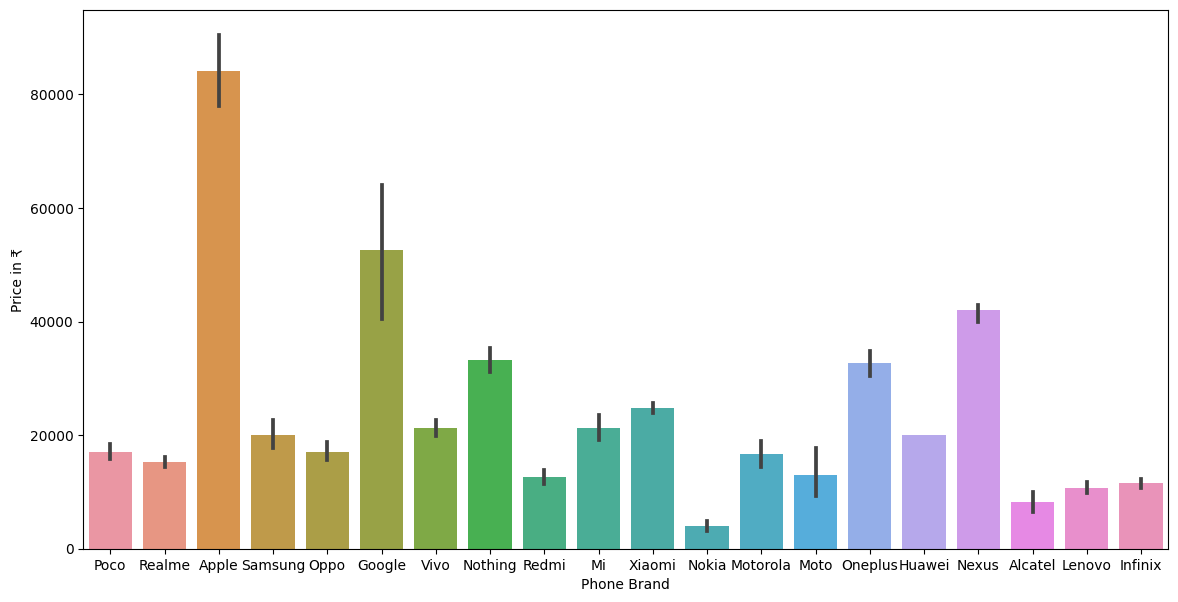

In [642]:
mp.figure(figsize=(14,7))
sn.barplot(data=df,x='Phone Brand',y='Price in ₹')

<Axes: xlabel='Model Name', ylabel='Price in ₹'>

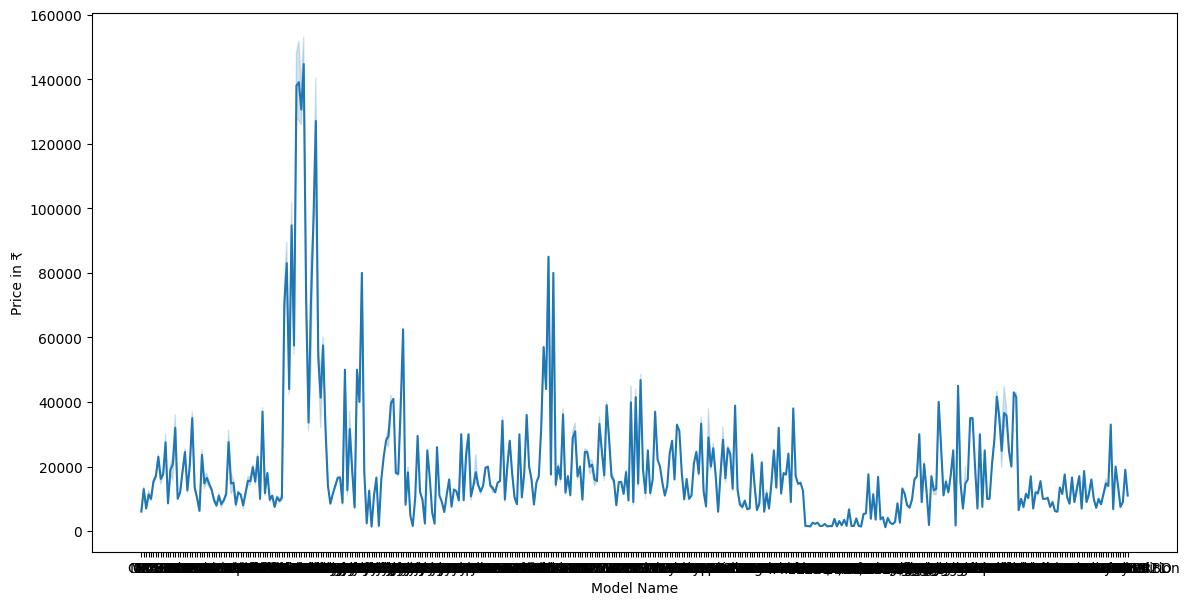

In [643]:
mp.figure(figsize=(14,7))
sn.lineplot(data=df,x='Model Name',y='Price in ₹')

<Axes: xlabel='Rating', ylabel='Price in ₹'>

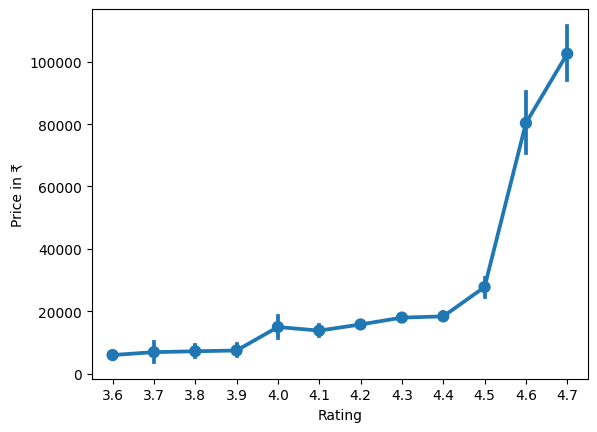

In [644]:
sn.pointplot(data=df,x='Rating',y='Price in ₹')

<Axes: xlabel='RAM IN GB', ylabel='Price in ₹'>

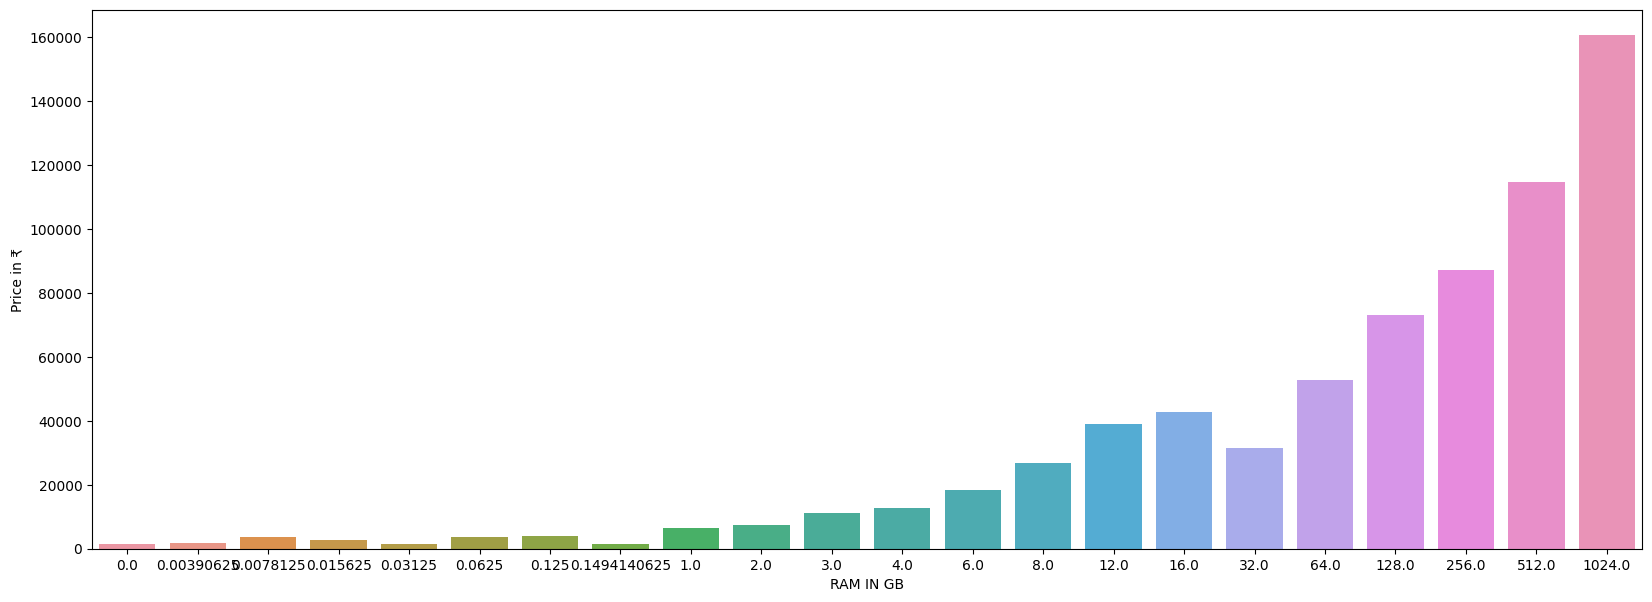

In [645]:
mp.figure(figsize=(20,7))
sn.barplot(data=df,x='RAM IN GB',y='Price in ₹',ci=False)

<Axes: xlabel='ROM IN GB', ylabel='Price in ₹'>

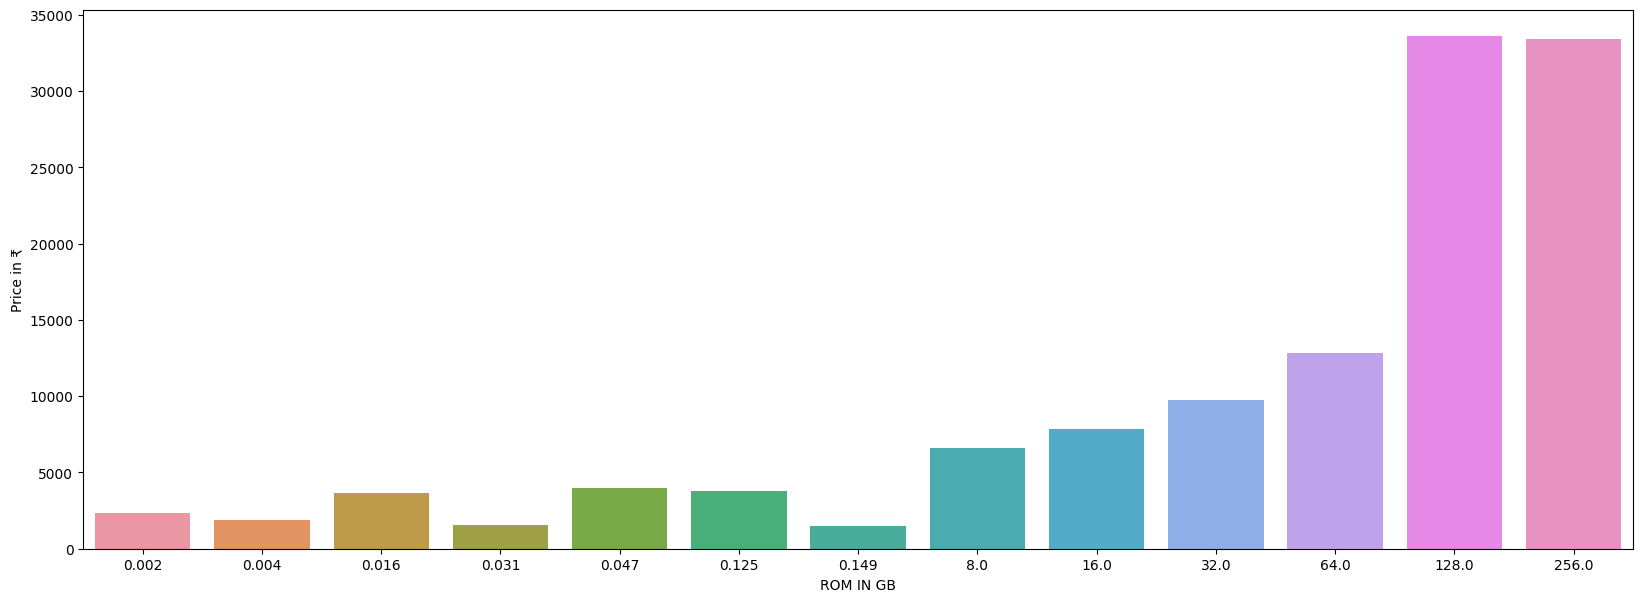

In [646]:
mp.figure(figsize=(20,7))
sn.barplot(data=df,x='ROM IN GB',y='Price in ₹',ci=False)

<Axes: xlabel='Processor Brand', ylabel='Price in ₹'>

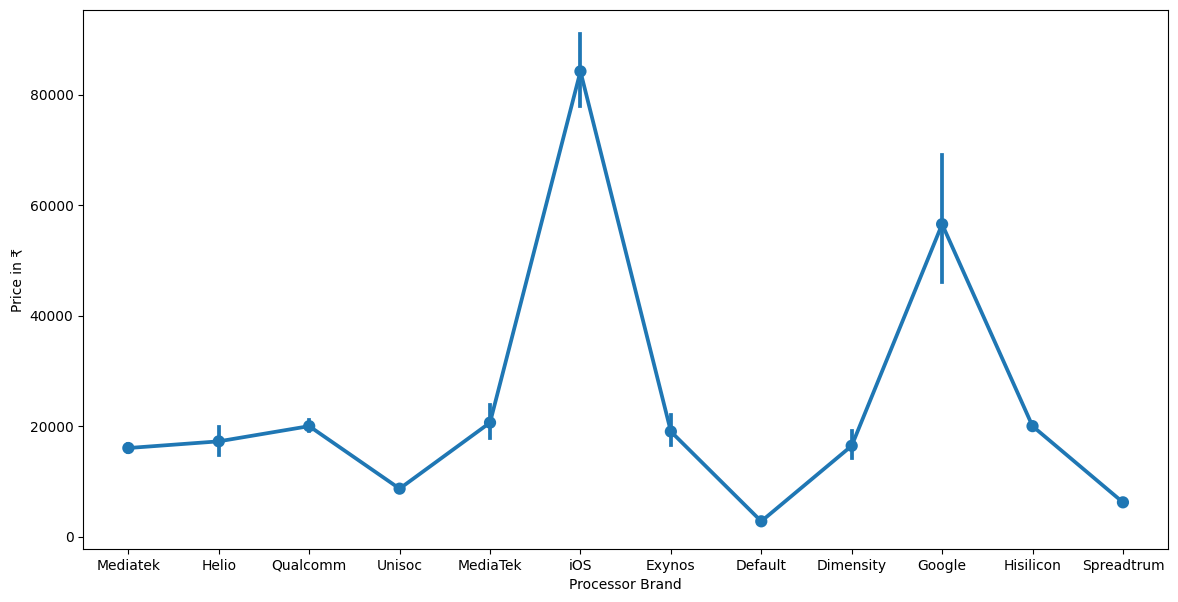

In [647]:
mp.figure(figsize=(14,7))
sn.pointplot(data=df,x='Processor Brand',y='Price in ₹')

<Axes: xlabel='Processor Names', ylabel='Price in ₹'>

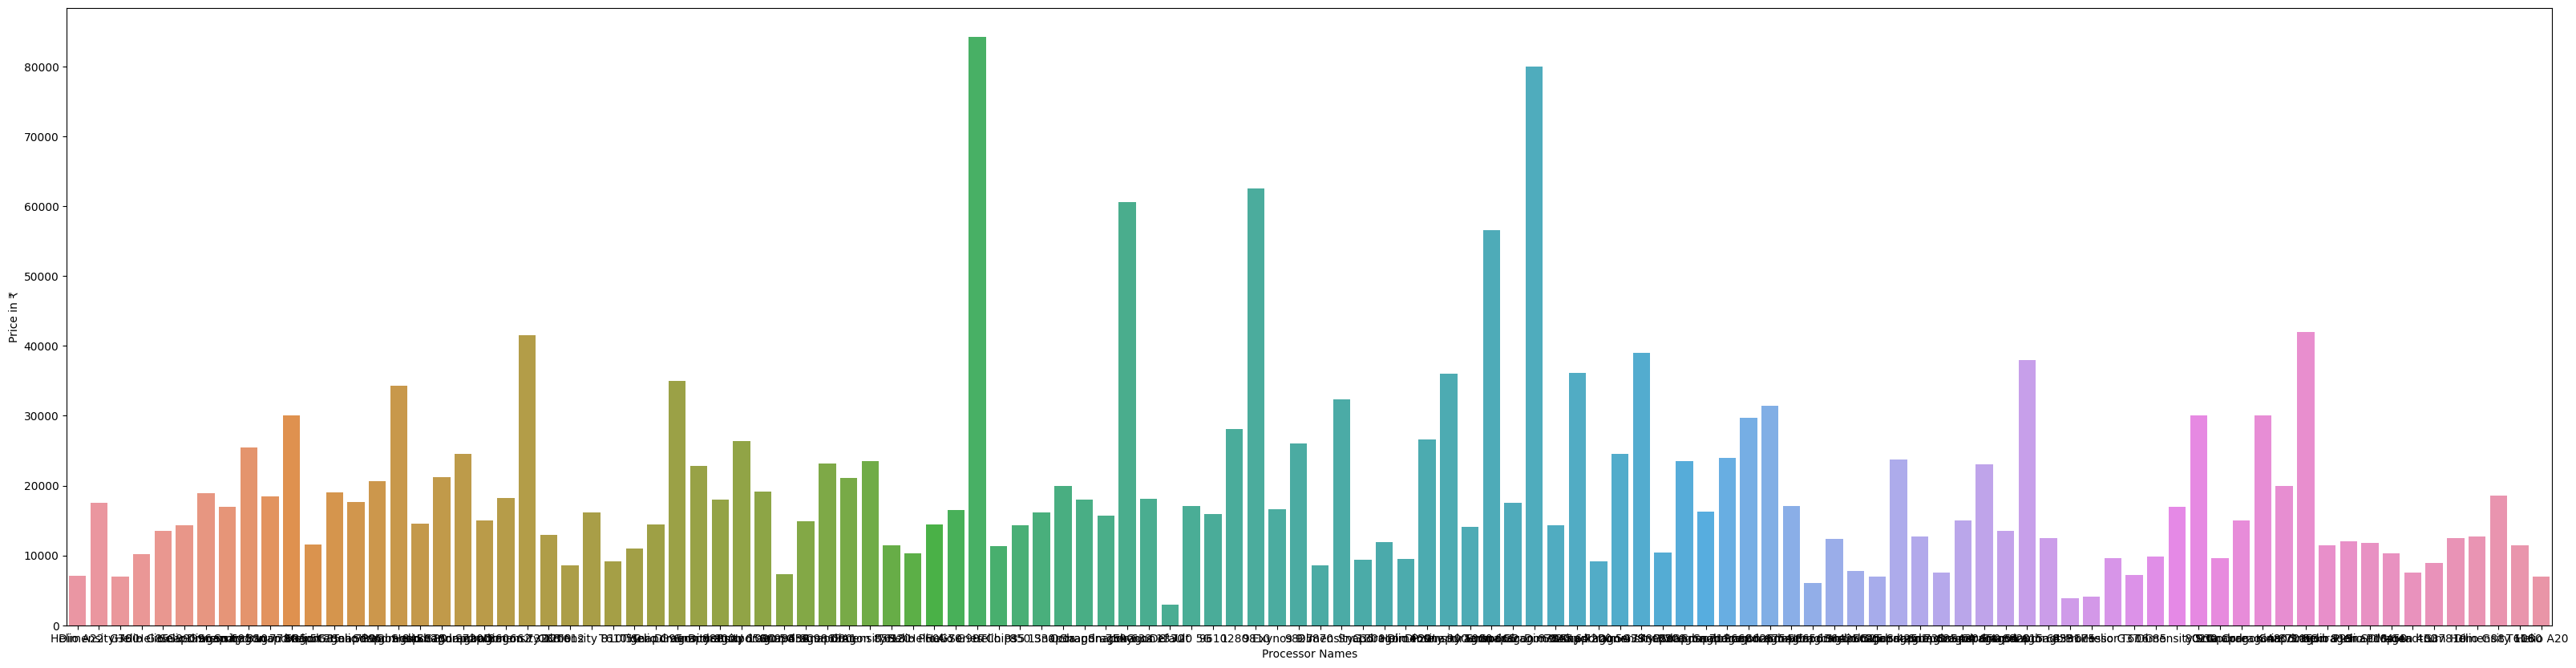

In [648]:
mp.figure(figsize=(40,10))
sn.barplot(data=df,x='Processor Names',y='Price in ₹',ci=False)

<Axes: >

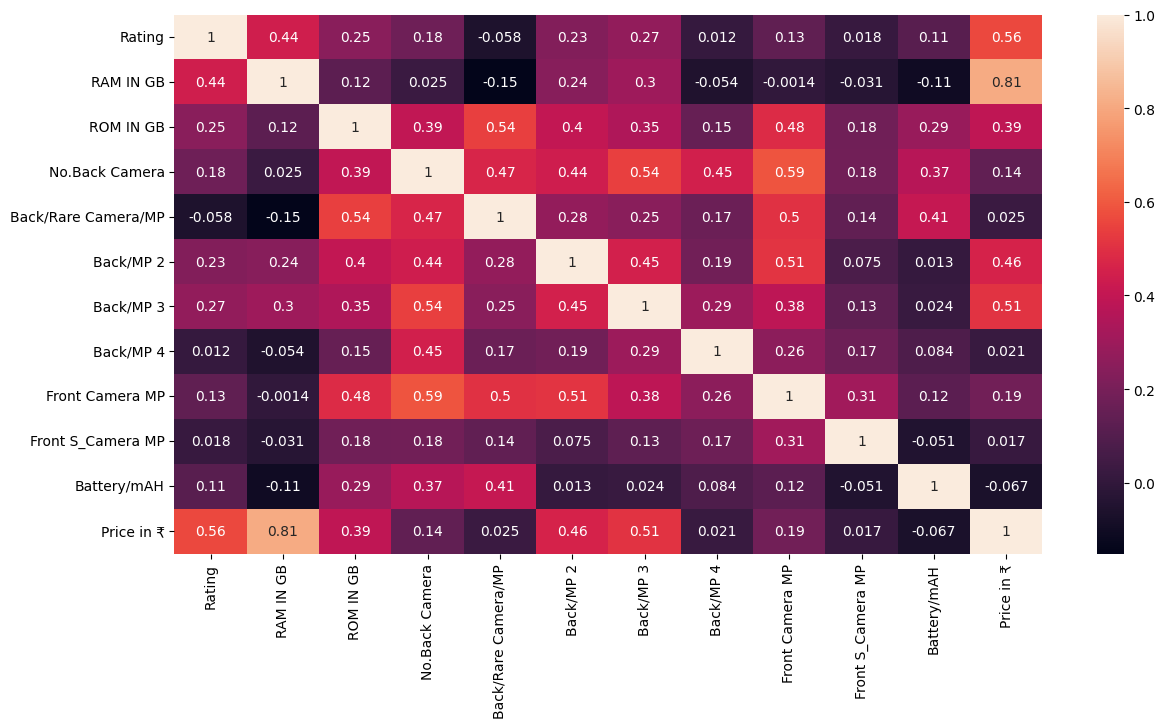

In [649]:
mp.figure(figsize=(14,7))
sn.heatmap(df.corr(),annot=True)

<Axes: xlabel='Back/Rare Camera/MP', ylabel='Phone Brand'>

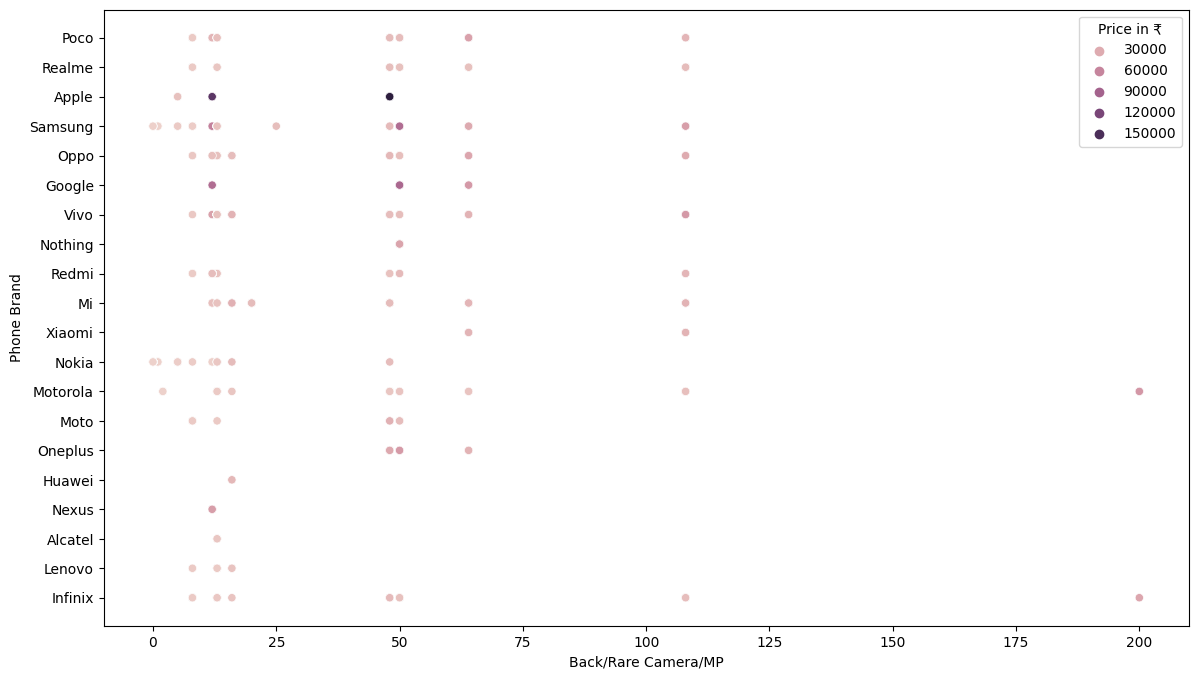

In [650]:
mp.figure(figsize=(14,8))
sn.scatterplot(data=df,x='Back/Rare Camera/MP',y='Phone Brand',hue='Price in ₹')

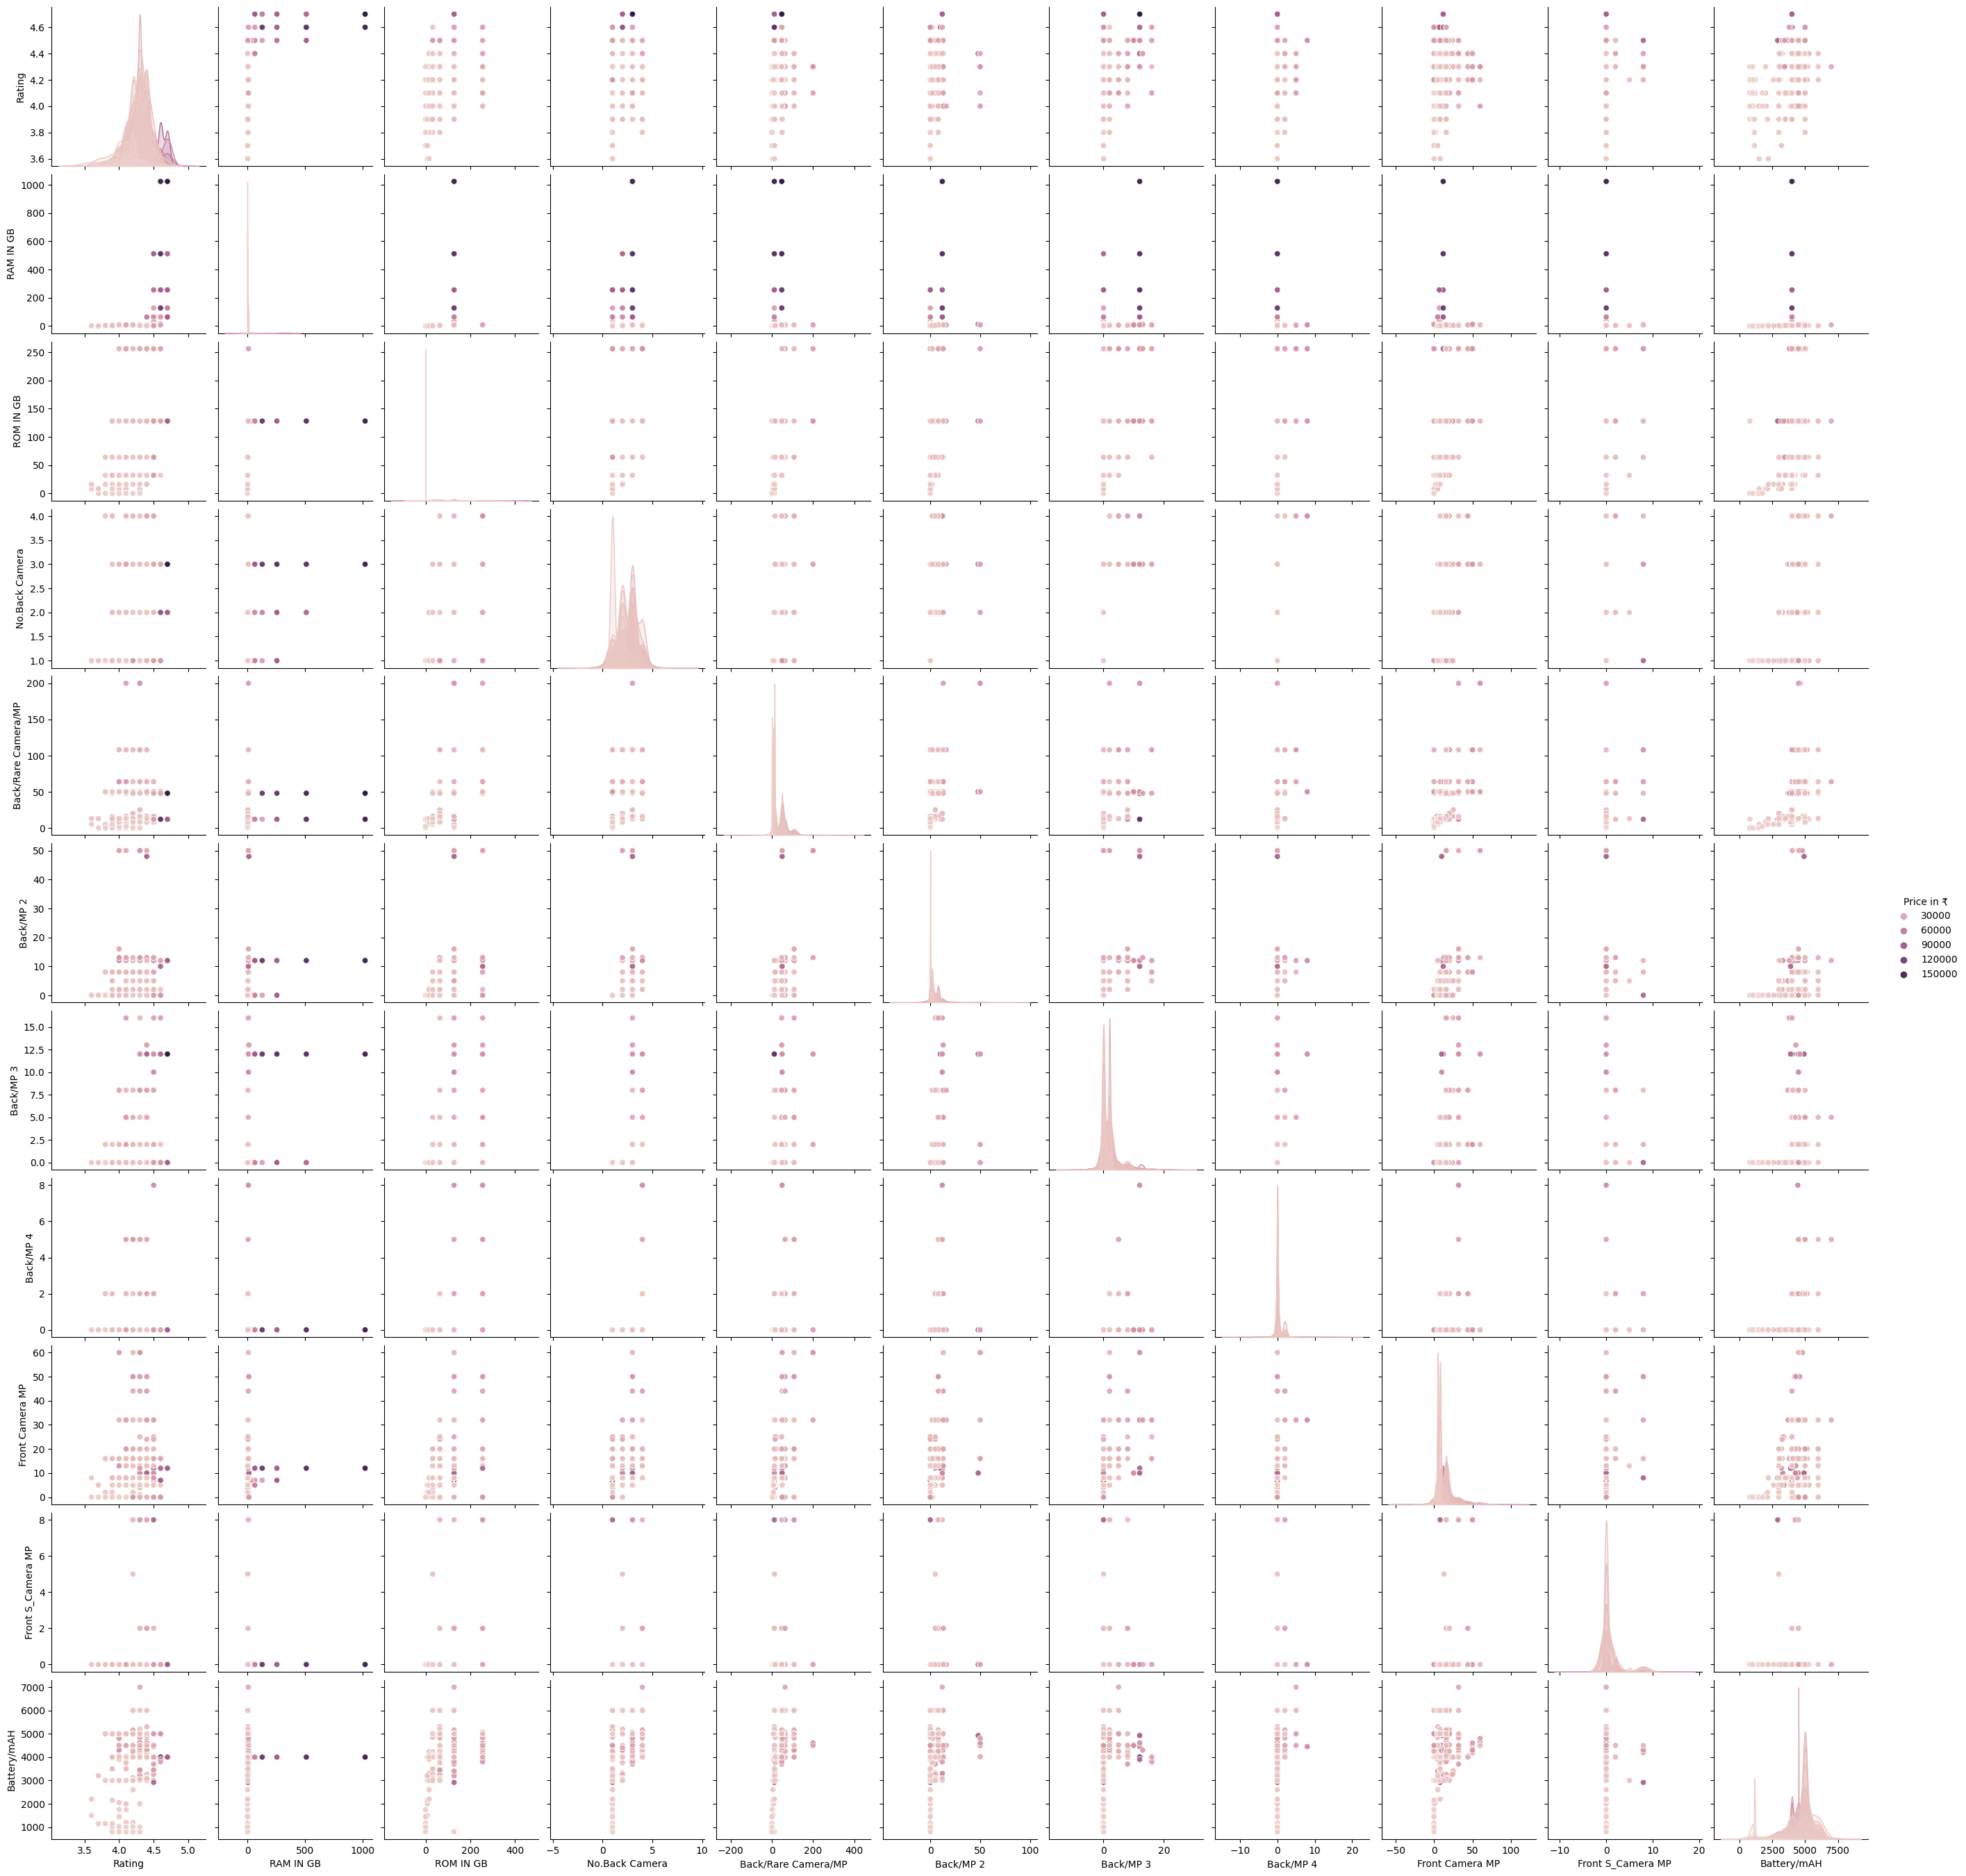

In [651]:
sn.pairplot(data=df,hue='Price in ₹')

In [698]:
df.sample(5)

,Phone Brand,Model Name,Rating,RAM IN GB,ROM IN GB,No.Back Camera,Back/Rare Camera/MP,Back/MP 2,Back/MP 3,Back/MP 4,Front Camera MP,Front S_Camera MP,Battery/mAH,Processor Brand,Processor Names,Price in ₹
1144,Redmi,8A,4.4,2.000000,32.000,1,12,0,0,0,8,0,5000.0,Qualcomm,Snapdragon 439,7999.0
1054,Vivo,Y91,4.4,3.000000,32.000,2,13,2,0,0,8,0,4030.0,Qualcomm,Snapdragon 439,10990.0
1339,Nokia,105 PLUS,4.1,0.003906,0.004,1,0,0,0,0,0,0,1000.0,Default,Default,1899.0
718,Samsung,Metro 313 Dual Sim,4.3,0.003906,0.002,1,0,0,0,0,0,0,1000.0,Default,Default,2340.0
1533,Motorola,g52,4.2,4.000000,64.000,3,50,8,2,0,16,0,5000.0,Qualcomm,Snapdragon 680,11249.0


DOING "DATA PRE PROCESSING" HERE FOR MAKING A MODEL

In [653]:
X=df.drop('Price in ₹',axis=1)
Y=df['Price in ₹']

In [654]:
print("The shape of dependent variable: ",X.shape)
print("The shape of independent variable: ",Y.shape)

The shape of dependent variable:  (1417, 15)
The shape of independent variable:  (1417,)


In [655]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [656]:
ct=ColumnTransformer(transformers=[('scaler',StandardScaler(),['Rating',	'RAM IN GB',	'ROM IN GB',	'No.Back Camera',	'Back/Rare Camera/MP',	'Back/MP 2',	'Back/MP 3',	'Back/MP 4',	'Front Camera MP',	'Front S_Camera MP'	,'Battery/mAH']),('encode',OneHotEncoder(handle_unknown='ignore',drop='first',sparse=False),['Phone Brand','Model Name','Processor Brand','Processor Names'])],remainder='passthrough')

USING VARIOUS MODEL AND SELECTING THE BEST MODEL FROM THEM 

LINEAR REGRESSION MODEL

In [657]:
Lrpipe=Pipeline(steps=[('column_trans',ct),('lr',LinearRegression())])

In [658]:
Lrpipe.fit(X_train,Y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Rating', 'RAM IN GB',
                                                   'ROM IN GB',
                                                   'No.Back Camera',
                                                   'Back/Rare Camera/MP',
                                                   'Back/MP 2', 'Back/MP 3',
                                                   'Back/MP 4',
                                                   'Front Camera MP',
                                                   'Front S_Camera MP',
                                                   'Battery/mAH']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Phone Brand', 'Model Name',
                                                   'Processor Brand',
                                                   'Processor Names'])])),
                ('lr', LinearRegression())])

In [659]:
predictions = Lrpipe.predict(x_test)
xpred=Lrpipe.predict(X_train)

In [660]:
print(f"The r2_score of test is {r2_score(y_test,predictions)}")
print(f"The r2_score of training is {r2_score(xpred,Y_train)}")

The r2_score of test is -4.276364716580897e+19
The r2_score of training is 0.9925130145865942


DECISION TREE REGRESSOR

In [661]:
Dt=Pipeline(steps=[('column_trans',ct),('Dt',DecisionTreeRegressor())])

In [662]:
Dt.fit(X_train,Y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Rating', 'RAM IN GB',
                                                   'ROM IN GB',
                                                   'No.Back Camera',
                                                   'Back/Rare Camera/MP',
                                                   'Back/MP 2', 'Back/MP 3',
                                                   'Back/MP 4',
                                                   'Front Camera MP',
                                                   'Front S_Camera MP',
                                                   'Battery/mAH']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Phone Brand', 'Model Name',
                                                   'Processor Brand',
                                                   'Processor Names'])])),
                ('Dt', DecisionTreeRegressor())])

In [663]:
predictions = Dt.predict(x_test)
xpred=Dt.predict(X_train)

In [664]:
print(f"The r2_score of test is {r2_score(y_test,predictions)}")
print(f"The r2_score of training is {r2_score(xpred,Y_train)}")

The r2_score of test is 0.9448086917413975
The r2_score of training is 0.999386613308213


ADABOOSTER REGRESSOR

In [665]:
Ada=Pipeline(steps=[('column_trans',ct),('Ada',AdaBoostRegressor())])

In [666]:
Ada.fit(X_train,Y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Rating', 'RAM IN GB',
                                                   'ROM IN GB',
                                                   'No.Back Camera',
                                                   'Back/Rare Camera/MP',
                                                   'Back/MP 2', 'Back/MP 3',
                                                   'Back/MP 4',
                                                   'Front Camera MP',
                                                   'Front S_Camera MP',
                                                   'Battery/mAH']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Phone Brand', 'Model Name',
                                                   'Processor Brand',
                                                   'Processor Names'])])),
                ('Ada', AdaBoostRegressor())])

In [667]:
predictions = Ada.predict(x_test)
xpred=Ada.predict(X_train)

In [668]:
print(f"The r2_score of test is {r2_score(y_test,predictions)}")
print(f"The r2_score of training is {r2_score(xpred,Y_train)}")

The r2_score of test is 0.8573392244721426
The r2_score of training is 0.7947022915299474


EXTRATREE REGRESSOR

In [669]:
Exr=Pipeline(steps=[('column_trans',ct),('ex',ExtraTreesRegressor())])

In [670]:
Exr.fit(X_train,Y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Rating', 'RAM IN GB',
                                                   'ROM IN GB',
                                                   'No.Back Camera',
                                                   'Back/Rare Camera/MP',
                                                   'Back/MP 2', 'Back/MP 3',
                                                   'Back/MP 4',
                                                   'Front Camera MP',
                                                   'Front S_Camera MP',
                                                   'Battery/mAH']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Phone Brand', 'Model Name',
                                                   'Processor Brand',
                                                   'Processor Names'])])),
                ('ex', ExtraTreesRegressor())])

In [671]:
predictions = Exr.predict(x_test)
xpred=Exr.predict(X_train)

In [672]:
print(f"The r2_score of test is {r2_score(y_test,predictions)}")
print(f"The r2_score of training is {r2_score(xpred,Y_train)}")

The r2_score of test is 0.9868124248109712
The r2_score of training is 0.999386613308213


XGBOOST REGRESSOR

In [673]:
xgb=Pipeline(steps=[('column_trans',ct),('xgb',XGBRegressor())])

In [674]:
xgb.fit(X_train,Y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Rating', 'RAM IN GB',
                                                   'ROM IN GB',
                                                   'No.Back Camera',
                                                   'Back/Rare Camera/MP',
                                                   'Back/MP 2', 'Back/MP 3',
                                                   'Back/MP 4',
                                                   'Front Camera MP',
                                                   'Front S_Camera MP',
                                                   'Battery/mAH']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Phone Bra...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [675]:
predictions = xgb.predict(x_test)
xpred=xgb.predict(X_train)

In [676]:
print(f"The r2_score of test is {r2_score(y_test,predictions)}")
print(f"The r2_score of training is {r2_score(xpred,Y_train)}")

The r2_score of test is 0.9818022009719362
The r2_score of training is 0.9981145517390339


RANDOM FOREST REGRESSOR

In [677]:
pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('regressor', RandomForestRegressor())
])

In [678]:
pipeline.fit(X_train, Y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['Rating', 'RAM IN GB',
                                                   'ROM IN GB',
                                                   'No.Back Camera',
                                                   'Back/Rare Camera/MP',
                                                   'Back/MP 2', 'Back/MP 3',
                                                   'Back/MP 4',
                                                   'Front Camera MP',
                                                   'Front S_Camera MP',
                                                   'Battery/mAH']),
                                                 ('encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Phone Brand', 'Model Name',
                                                   'Processor Brand',
                                                   'Processor Names'])])),
                ('regressor', RandomForestRegressor())])

In [679]:
predictions = pipeline.predict(x_test)
xpred=pipeline.predict(X_train)

In [680]:
print(f"The r2_score of test is {r2_score(y_test,predictions)}")
print(f"The r2_score of training is {r2_score(xpred,Y_train)}")

The r2_score of test is 0.9844780010047742
The r2_score of training is 0.9962154912711919


THE BEST MODEL FOR THIS DATA SET THAT WE GET IS "EXTRA TREE REGRESSOR"

BUILD THE MODEL AND DUMPED IT 

In [681]:

j.dump(Exr, "pipeline.jbl")

['pipeline.jbl']

In [682]:
model=j.load('pipeline.jbl')

TESTED THE MODEL AND THIS IS GIVING "ACCURATE RESULT" AS I EXPECTED 

In [704]:
data=['Motorola',	'g52',	4.2,	4.000000,	64.000,	3,	50,	8,	2,	0,	16,	0,	5000.0,'Qualcomm',	'Snapdragon 680'	]
if len(data) == len(X.columns):

    data_df = pd.DataFrame([data], columns=X.columns)

    predictions = model.predict(data_df)

    predicted_price = predictions[0] if isinstance(predictions, (list, np.ndarray)) else predictions

    print(f"The price of your searched {str.upper(data[0])} phone on basis of attributes is:", predicted_price)
else:
    print("Error: The length of the input data does not match the number of features.")

The price of your searched MOTOROLA phone on basis of attributes is: 11249.0


In [684]:
data=['Apple', 'iPhone 12', 4.6, 64.0, 128.0, 2, 12, 12, 0, 0, 12,0, 3500.0, 'iOS', 'A-Series Chips']
if len(data) == len(X.columns):

    data_df = pd.DataFrame([data], columns=X.columns)

    predictions = model.predict(data_df)

    predicted_price = predictions[0] if isinstance(predictions, (list, np.ndarray)) else predictions

    print(f"The price of your searched {str.upper(data[0])} phone on basis of attributes is:", predicted_price)
else:
    print("Error: The length of the input data does not match the number of features.")

The price of your searched Apple phone on basis of attributes is: 53999.0


    ERROR HANDLING

In [703]:
data=['Nokia',		0.003906,	0.004,	1,	0,	0,	0,	0,	0,	0,	1000.0,	'Default'	,'Default']
if len(data) == len(X.columns):

    data_df = pd.DataFrame([data], columns=X.columns)

    predictions = model.predict(data_df)

    predicted_price = predictions[0] if isinstance(predictions, (list, np.ndarray)) else predictions

    print(f"The price of your searched {str.upper(data[0])} phone on basis of attributes is:", predicted_price)
else:
    print("Error: The length of the input data does not match the number of features.")

Error: The length of the input data does not match the number of features.


THANK YOU FOR VISITING MY NOTEBOOK

IF YOU LIKED IT UPVOTE IT .AND ALSO CHECK MY OTHER MODELS 

HAVE A GREAT DAY SIR/MAA'M